**Exploratory Data Analaysis of AirBnB listings in one of the major locations of California - San Francisco**

**Overview of the data**

Data Source: http://insideairbnb.com/get-the-data.html

Data consists of the Airbnb listings from December 2022.Data consists of 16 columns which are:

id – represents the id of the listing (discrete)

name – It is the name of the listing (textual)

host_id – host id is a unique Id associated to each host in Airbnb (discrete)

host_name – the host’s name (textual)

neighbourhood_group – The city in which the listing is present (categorical)

neighbourhood – location of the listing (textual)

latitude – latitude value of the listing (continuous)

longitude – longitude value of the listing (continuous)

room_type – Category of the type of listing like entire house, private room etc. (categorical)

price – cost per night (continuous)

minimum_nights – minimum number of nights that the listing should be booked for (discrete)

number_of_reviews – total reviews received by the listing (discrete)

last_review – Date when the property received its last review (date)

reviews_per_month – the ratio of reviews received, and the time property is listed (continuous)

calculated_host_listings_count – the count of listings a host has on Airbnb (continuous)

availability_365 – the number of days a listing is available in a year (continuous)

number_of_reviews_ltm

license

Records count is 6,789

Reference for data source: http://www.columbia.edu/~sg3637/airbnb_final_analysis.html

**Objectives of the project:**

• Explore and clean the data for any missing values and duplicate data.

• Perform analysis on the price distribution in various major cities of California.

• Check if the price has a relation with the minimum stays as well as property type along with location.

• Perform geographical plotting of the price and location, and look for any interesting aspects near the San Francisco.

• Analyze the behavior of hosts with multiple listings.

• Understand the relation between reviews count, price and location.

• Create appropriate visualizations and build a summary of findings from the data.

***Motivation***

It asks and answers 3 questions :

1. What are the busiest months in San Francisco and the price variations of the same? This helps in understanding the options of housing and the prices for the same.
2. What are the type of rooms available? How does availability and price differ with type of room?
3. Which neighbourhood has most listings? How does availability and price vary with neighborhood? Is price related to number of listings in that neighbourhood? My blog post () on medium summarises the insights for a non-techinical audience.

***Files***

explore_analysis_summary_listingsreviewscalendarfiles.ipynb - it contains the code and graphs for the analysis

1. calendar.csv - it is a zipped file containing the day wise availability
2. reviews.csv - it is a summary version of reviews containing only the date, listing id and reviewer id.
3. listings.csv - it is a summary version of listings containing host id, listing id, neighborhood, availability etc.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd

import os
os.chdir('/content/drive/MyDrive/airbnb-data-analysis')

!pwd

Mounted at /content/drive/
/content
/content/drive/MyDrive/airbnb-data-analysis


# Data Understanding

In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import calendar
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
#Ingest calendar,listing and review data
sf_calendar = pd.read_csv('calendar.csv',parse_dates=['date'])
sf_listings = pd.read_csv('listings.csv')
sf_reviews = pd.read_csv('reviews.csv',parse_dates=['date'])
sf_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2022-12-04,f,$180.00,$180.00,2.0,1125.0
1,958,2022-12-05,f,$180.00,$180.00,2.0,1125.0
2,958,2022-12-06,f,$209.00,$209.00,2.0,1125.0
3,958,2022-12-07,f,$207.00,$207.00,2.0,1125.0
4,958,2022-12-08,f,$206.00,$206.00,2.0,1125.0


In [4]:
sf_reviews.head()

,listing_id,date
0,958,2009-07-23
1,958,2009-08-03
2,958,2009-09-27
3,958,2009-11-05
4,958,2010-02-13


In [5]:
pd.set_option('display.max_rows', sf_reviews.shape[0]+1)

In [6]:
sf_reviews.date.max()

Timestamp('2022-12-03 00:00:00')

In [7]:
sf_reviews.date.min()

Timestamp('2009-05-03 00:00:00')

In [8]:
sf_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,194,2,371,2022-11-18,2.28,1,161,57,City Registration Pending
1,487499,Mission District - Perfect Location,1682183,Daniel,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,192,2022-10-31,1.51,1,356,5,NaN
2,144978,Prime Location - Small Basic Room,216682,Jay,NaN,Pacific Heights,37.79233,-122.42431,Private room,55,30,120,2020-03-31,0.86,9,54,0,NaN
3,490931,"Mission's ""La Lengua""",1269188,Maureen,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,79,2015-08-01,0.75,1,358,0,NaN
4,147443,Best Views in all of San Francisco,709325,Mark,NaN,Diamond Heights,37.74633,-122.44591,Entire home/apt,167,30,112,2022-09-30,0.80,5,187,2,STR-0000672


In [9]:
sf_listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.789000e+03,6.789000e+03,0.0,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,5562.000000,6789.000000,6789.000000,6789.000000
mean,1.208976e+17,1.023542e+08,NaN,37.768296,-122.430186,268.709088,23.556930,48.659449,1.364036,13.667256,173.049345,10.637207
std,2.589342e+17,1.332468e+08,NaN,0.023061,0.027537,944.974389,53.748277,94.476154,1.991691,31.192535,133.141768,22.925957
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.693015e+07,5.805679e+06,NaN,37.752970,-122.442880,99.000000,2.000000,1.000000,0.200000,1.000000,46.000000,0.000000
50%,3.564333e+07,3.601338e+07,NaN,37.772640,-122.423030,150.000000,6.000000,8.000000,0.580000,2.000000,164.000000,2.000000
75%,5.123414e+07,1.565042e+08,NaN,37.787430,-122.410390,250.000000,30.000000,49.000000,1.870000,9.000000,310.000000,10.000000
max,7.734981e+17,4.896232e+08,NaN,37.809540,-122.358480,25000.000000,1125.000000,977.000000,36.490000,153.000000,365.000000,558.000000


In [10]:
sf_listings[sf_listings["price"]==0]["price"].count()

3

In [11]:
sf_listings.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6789
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1227
reviews_per_month                 1227
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2697
dtype: int64

Based on these results, there are several missing observations in 'name' and 'host_name' but due to PII data concerns, these will be removed from the dataset, while the id number as well as lat/long will still provide enough information to understand the user and the general location of the apartment.

Moreover, we can see that last_review and reviews_per_month are both missing 1,227 observations. For "last_review", is there are no reviews for the listing - the date for this listing simply does not exist. As such, the column is irrelevant and therefore amending these values is not necessary. For the variable "reviews_per_month", we can amend the missing values as 0.0, which will indicate that that the "number_of_review" column will also be 0. As such, the "reviews_per_month" would then also equal 0.0 reviews per month.

The variable "license," refers to whether a host_id has a specific license registered regarding the renting of a room or apartment. While this may be relevant for understanding how many users actually have an official license to officially rent out an apartment, this is not relevant for our understanding of the changing prices and growing areas of rent for our dataset. As such, this variable will likewise be removed.

Based on the above understanding of the dataset we have at hand, we can drop several columns to ensure privacy while also removing/appending variables as necessary.

***Data Cleaning***

***Dropping Columns/Variables***

***Dropping columns that are either for this analysis irrelavant or more problematic, contain PII data***

In [12]:
sf_listings.drop(['name', 'host_name', 'last_review', 'license'], axis=1, inplace=True)

sf_listings.head(5)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,958,1169,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,194,2,371,2.28,1,161,57
1,487499,1682183,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,192,1.51,1,356,5
2,144978,216682,NaN,Pacific Heights,37.79233,-122.42431,Private room,55,30,120,0.86,9,54,0
3,490931,1269188,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,79,0.75,1,358,0
4,147443,709325,NaN,Diamond Heights,37.74633,-122.44591,Entire home/apt,167,30,112,0.80,5,187,2


In [13]:
sf_listings = sf_listings[sf_listings.price > 0]

In [14]:
sf_listings.shape

(6786, 14)

In [18]:
sf_listings.reviews_per_month.describe()

count    5560.000000
mean        1.364401
std         1.991955
min         0.010000
25%         0.200000
50%         0.580000
75%         1.870000
max        36.490000
Name: reviews_per_month, dtype: float64

In [19]:
sf_listings.number_of_reviews.describe()

count    5560.000000
mean       59.413129
std       101.292337
min         1.000000
25%         4.000000
50%        16.000000
75%        66.000000
max       977.000000
Name: number_of_reviews, dtype: float64

In [17]:
sf_listings = sf_listings[sf_listings.reviews_per_month > 0]
sf_listings.shape

(5560, 14)

In [20]:
#dropping the outlier whose minimum nights is greater than 365
sf_listings = sf_listings[sf_listings["minimum_nights"]<=365]

In [21]:
sf_listings.shape

(5554, 14)

***Replacing missing values***

In [22]:
# Replacing all NaN values under "reviews_per_month" with 0
sf_listings.fillna({'reviews_per_month':0}, inplace=True)

sf_listings.reviews_per_month.isnull().sum()

0

<Axes: ylabel='Frequency'>

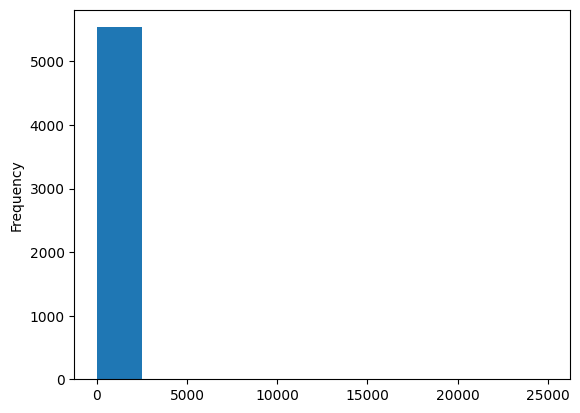

In [23]:
sf_listings["price"].plot(kind="hist")

In [24]:
np.percentile(sf_listings["price"],95)

550.0

In [25]:
sf_listings['price'].max()

25000

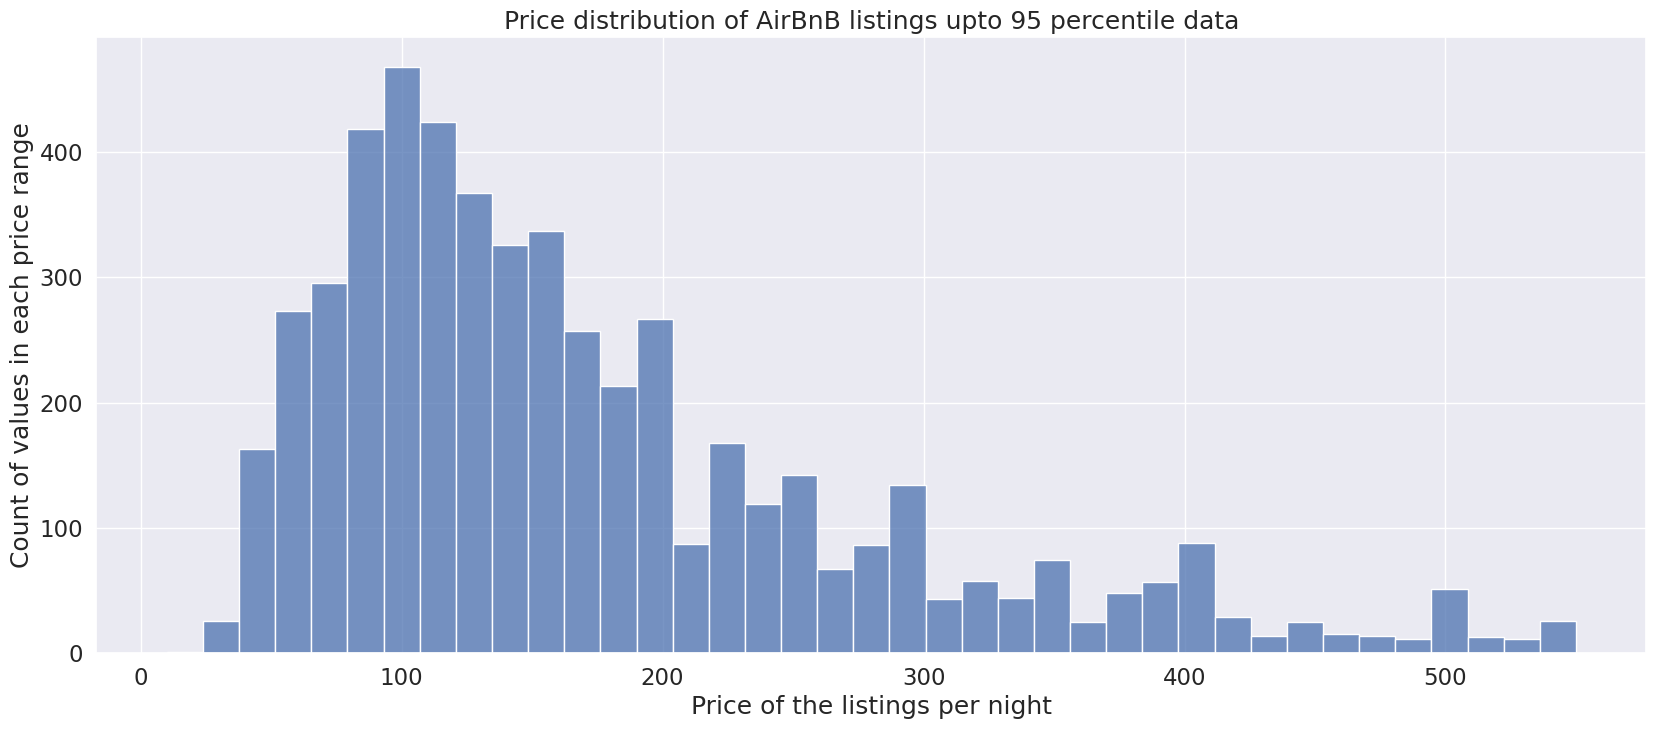

In [26]:
#Considering the 95 percentile data of price
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.5)
sns.histplot(sf_listings[sf_listings["price"]<=550]["price"],kde=False)
plt.title("Price distribution of AirBnB listings upto 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

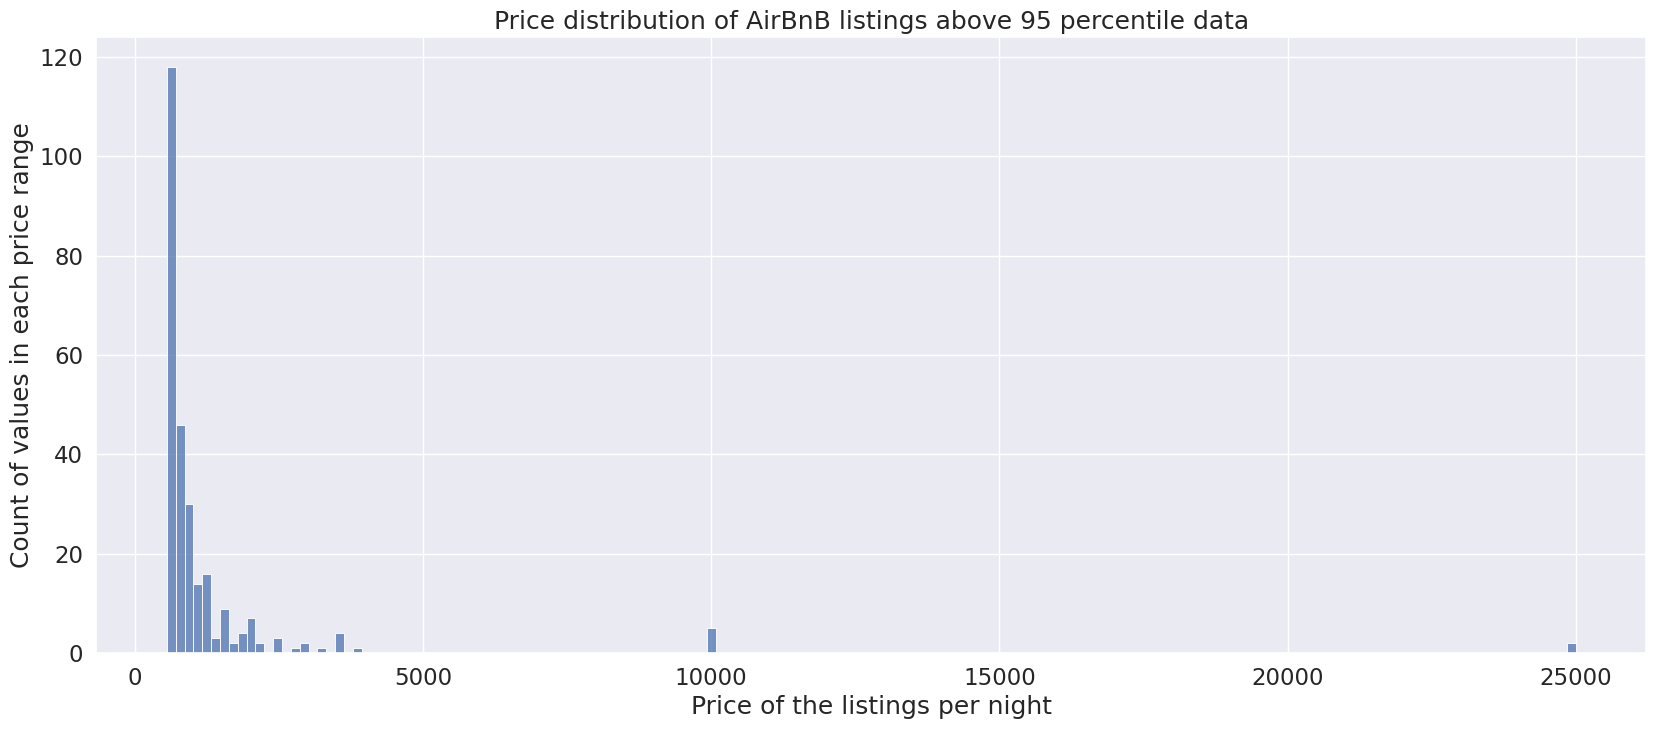

In [27]:
sns.histplot(sf_listings[sf_listings["price"]>550]["price"],kde=False)
plt.title("Price distribution of AirBnB listings above 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

In [28]:
# Checking for duplicates

sf_listings.duplicated().sum()

0

In [29]:
sf_listings.neighbourhood.unique()

array(['Western Addition', 'Mission', 'Pacific Heights', 'Bernal Heights',
       'Diamond Heights', 'Haight Ashbury', 'Marina', 'Twin Peaks',
       'Outer Mission', 'Outer Richmond', 'Castro/Upper Market',
       'Financial District', 'Chinatown', 'Russian Hill', 'Glen Park',
       'Bayview', 'Excelsior', 'Noe Valley', 'North Beach',
       'Downtown/Civic Center', 'Potrero Hill', 'Nob Hill',
       'Inner Richmond', 'Inner Sunset', 'Parkside', 'Outer Sunset',
       'South of Market', 'West of Twin Peaks', 'Lakeshore',
       'Presidio Heights', 'Ocean View', 'Crocker Amazon',
       'Golden Gate Park', 'Presidio', 'Seacliff', 'Visitacion Valley'],
      dtype=object)

In [30]:
len(sf_listings.neighbourhood.unique())

36

There are 36 unique neighbourhoods within San Francisco

In [31]:
# We can also quickly examine who are the top 10 hosts and what are the top 10 prices within the dataset.

#The top 10 host_id listings on the AirBnB platform

top_10_host=sf_listings.host_id.value_counts().head(10)
top_10_host

4430421      121
70722023      61
173206762     57
17042045      48
107434423     43
52178915      43
117141107     42
64646820      37
253575857     36
6346492       28
Name: host_id, dtype: int64

In [32]:
# The top 10 price of AirBnB rentals per night

top_10_price=sf_listings.price.value_counts().head(10)
top_10_price

125    105
150    104
100     98
109     82
95      80
250     80
120     74
99      73
149     69
85      69
Name: price, dtype: int64

In [33]:
# Based on the above we can see that their are some very expensive rental units per night, 
## which is likely not an accurate display of SF's AirBnB rental scene.
price_mean=sf_listings.price.mean()
price_mean

229.42293842275836

In [34]:
## Based on the above, we can see that the average price for an AirBnB rental is approximately $229.42 per night

While the above are simply only quick overviews of the dataset provided, there is certainly enough information that will allow for a proper hypothesis and analysis of the data to better understand where the most popular neighbourhoods are for renting and what the average price for that area would be.

In [35]:
sf_listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.554000e+03,5.554000e+03,0.0,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000
mean,8.398755e+16,9.170018e+07,NaN,37.766619,-122.431827,229.422938,18.464890,59.457328,1.365621,11.605870,169.276017,13.002161
std,2.181663e+17,1.261480e+08,NaN,0.023267,0.027920,603.518404,38.568608,101.335756,1.992663,27.350781,129.396143,24.733421
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.511360,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.344900e+07,4.996407e+06,NaN,37.750820,-122.444738,99.000000,2.000000,4.000000,0.200000,1.000000,48.000000,1.000000
50%,3.103663e+07,2.686011e+07,NaN,37.769440,-122.424390,149.000000,4.000000,16.000000,0.580000,2.000000,159.000000,3.000000
75%,4.893218e+07,1.312004e+08,NaN,37.786767,-122.411023,243.000000,30.000000,66.000000,1.870000,7.000000,300.000000,15.000000
max,7.669620e+17,4.873070e+08,NaN,37.809540,-122.358480,25000.000000,365.000000,977.000000,36.490000,153.000000,365.000000,558.000000


In [36]:
sf_listings.isnull().sum()

id                                   0
host_id                              0
neighbourhood_group               5554
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [37]:
sf_listing_data_95 = sf_listings[sf_listings["price"]<=np.percentile(sf_listings["price"],95)]

In [38]:
sf_listing_data_95.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.284000e+03,5.284000e+03,0.0,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000
mean,8.420145e+16,9.265703e+07,NaN,37.766123,-122.431783,173.363929,18.963853,61.157078,1.398880,12.052422,170.174111,13.327593
std,2.183342e+17,1.265045e+08,NaN,0.023276,0.028161,106.425717,39.178538,103.103821,2.027583,27.947513,129.401758,25.226687
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.511360,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.397853e+07,5.042117e+06,NaN,37.750200,-122.444900,98.000000,2.000000,4.000000,0.210000,1.000000,49.000000,1.000000
50%,3.112447e+07,2.781674e+07,NaN,37.769395,-122.424195,143.000000,4.000000,16.000000,0.600000,2.000000,161.000000,3.000000
75%,4.903898e+07,1.312004e+08,NaN,37.786340,-122.410857,220.000000,30.000000,69.000000,1.930000,7.000000,301.000000,16.000000
max,7.669620e+17,4.873070e+08,NaN,37.809540,-122.358480,550.000000,365.000000,977.000000,36.490000,153.000000,365.000000,558.000000


In [39]:
sf_listing_data_95.shape

(5284, 14)

In [40]:
#change true and false as 1 and 0 respectively for considering only available==1 entries
replace_map = {'available':{'f': 0,'t' : 1}}
sf_calendar.replace(replace_map, inplace=True)
sf_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2022-12-04,0,$180.00,$180.00,2.0,1125.0
1,958,2022-12-05,0,$180.00,$180.00,2.0,1125.0
2,958,2022-12-06,0,$209.00,$209.00,2.0,1125.0
3,958,2022-12-07,0,$207.00,$207.00,2.0,1125.0
4,958,2022-12-08,0,$206.00,$206.00,2.0,1125.0


In [41]:
sf_listing_data_95.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,958,1169,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,194,2,371,2.28,1,161,57
1,487499,1682183,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,192,1.51,1,356,5
2,144978,216682,NaN,Pacific Heights,37.79233,-122.42431,Private room,55,30,120,0.86,9,54,0
3,490931,1269188,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,79,0.75,1,358,0
4,147443,709325,NaN,Diamond Heights,37.74633,-122.44591,Entire home/apt,167,30,112,0.80,5,187,2


In [42]:
sf_reviews.head()

,listing_id,date
0,958,2009-07-23
1,958,2009-08-03
2,958,2009-09-27
3,958,2009-11-05
4,958,2010-02-13


In [43]:
print(sf_calendar.describe())
print(sf_listing_data_95.info())

         listing_id     available  minimum_nights  maximum_nights
count  2.477255e+06  2.477255e+06    2.477254e+06    2.477254e+06
mean   1.209332e+17  4.744497e-01    3.042452e+01    8.934026e+06
std    2.589450e+17  4.993469e-01    7.192692e+01    1.382176e+08
min    9.580000e+02  0.000000e+00    1.000000e+00    1.000000e+00
25%    1.691329e+07  0.000000e+00    2.000000e+00    9.000000e+01
50%    3.564288e+07  0.000000e+00    7.000000e+00    1.125000e+03
75%    5.124623e+07  1.000000e+00    3.000000e+01    1.125000e+03
max    7.734981e+17  1.000000e+00    1.125000e+03    2.147484e+09
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5284 entries, 0 to 6785
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5284 non-null   int64  
 1   host_id                         5284 non-null   int64  
 2   neighbourhood_group             0 non-null      fl

***Data Preparation***

***In this section, we drop 2 columns a) 'neighbourhood_group' from sf_listings as it has only NaN values b) 'adjusted_price' from sf_calendar as it has the same values as 'price'***

In [44]:
# remove redundant columns like neigbourhood_group from listings and adjusted_price from calendar
sf_listing_data_95 = sf_listing_data_95.drop(columns = ['neighbourhood_group'])
sf_calendar = sf_calendar.drop(['adjusted_price'],axis=1)

#check the sizes of the dataset
print('Listings :{}'.format(sf_listing_data_95.shape))
print('Reviews :{}'.format(sf_reviews.shape))
print('Calendar :{}'.format(sf_calendar.shape))

Listings :(5284, 13)
Reviews :(330349, 2)
Calendar :(2477255, 6)


In [45]:
# Creating a subset without 'id' and 'host_id' (Not sure if latitude/longitude are considered index variables?)

sub = sf_listing_data_95[['neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 
            'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

In [46]:
sub.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.193605,0.119027,0.061077,-0.115188,-0.122973,0.215258,0.049850,-0.090251
longitude,0.193605,1.000000,0.035500,0.068404,-0.148252,-0.171872,0.195768,0.030032,-0.150962
price,0.119027,0.035500,1.000000,-0.135237,-0.073403,-0.054255,-0.130474,-0.058441,-0.059060
minimum_nights,0.061077,0.068404,-0.135237,1.000000,-0.175966,-0.220633,0.048850,0.155518,-0.198124
number_of_reviews,-0.115188,-0.148252,-0.073403,-0.175966,1.000000,0.614711,-0.158750,-0.010297,0.636858
reviews_per_month,-0.122973,-0.171872,-0.054255,-0.220633,0.614711,1.000000,-0.176701,-0.007187,0.850801
calculated_host_listings_count,0.215258,0.195768,-0.130474,0.048850,-0.158750,-0.176701,1.000000,0.025964,-0.137655
availability_365,0.049850,0.030032,-0.058441,0.155518,-0.010297,-0.007187,0.025964,1.000000,0.017033
number_of_reviews_ltm,-0.090251,-0.150962,-0.059060,-0.198124,0.636858,0.850801,-0.137655,0.017033,1.000000


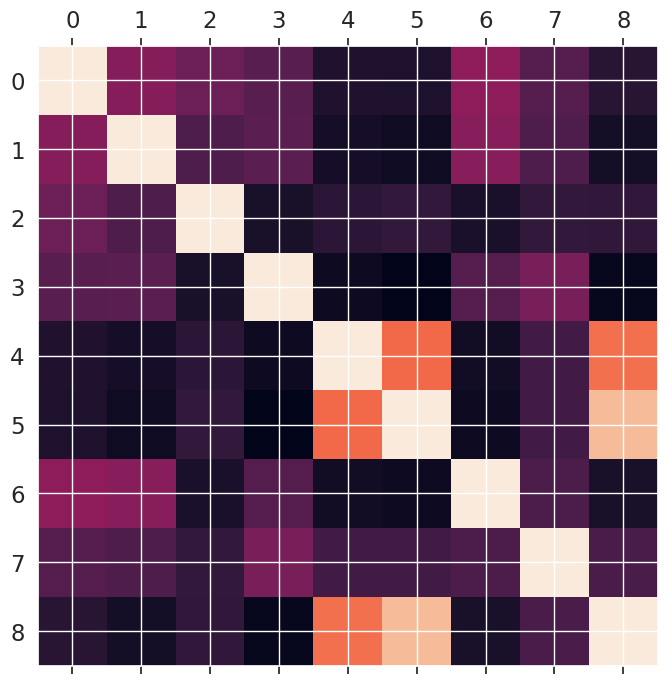

In [47]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

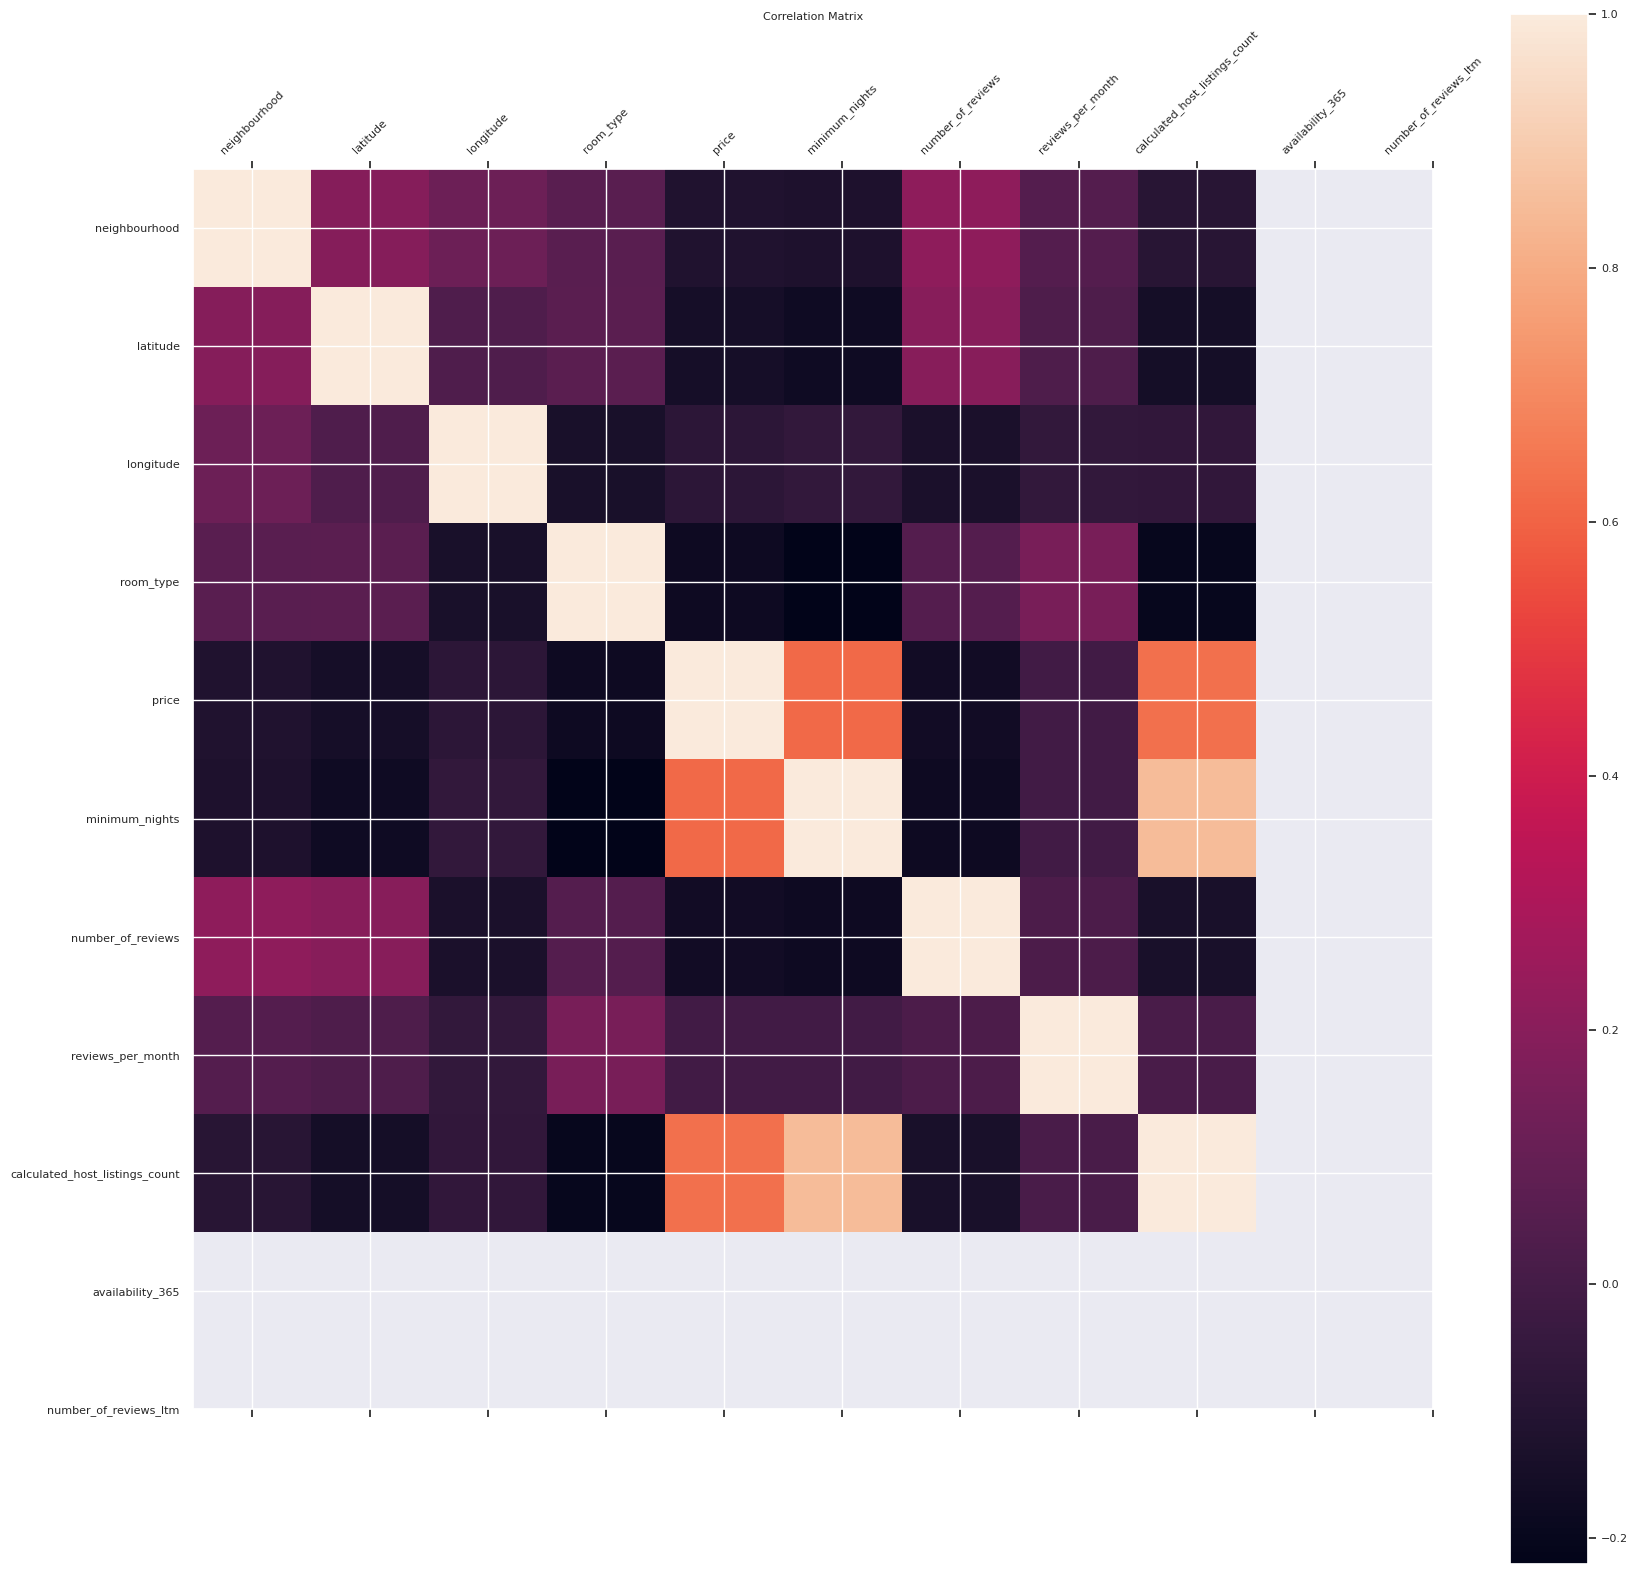

In [48]:
# Adding labels, legend, and increase size of heatmap

f = plt.figure(figsize=(20, 20)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=8) # add title

***I looked around a bit on stackoverflow and reddit forums and it's not clear to me why there is an empty space in my correlation mapping***

***Correlation Heatmap***

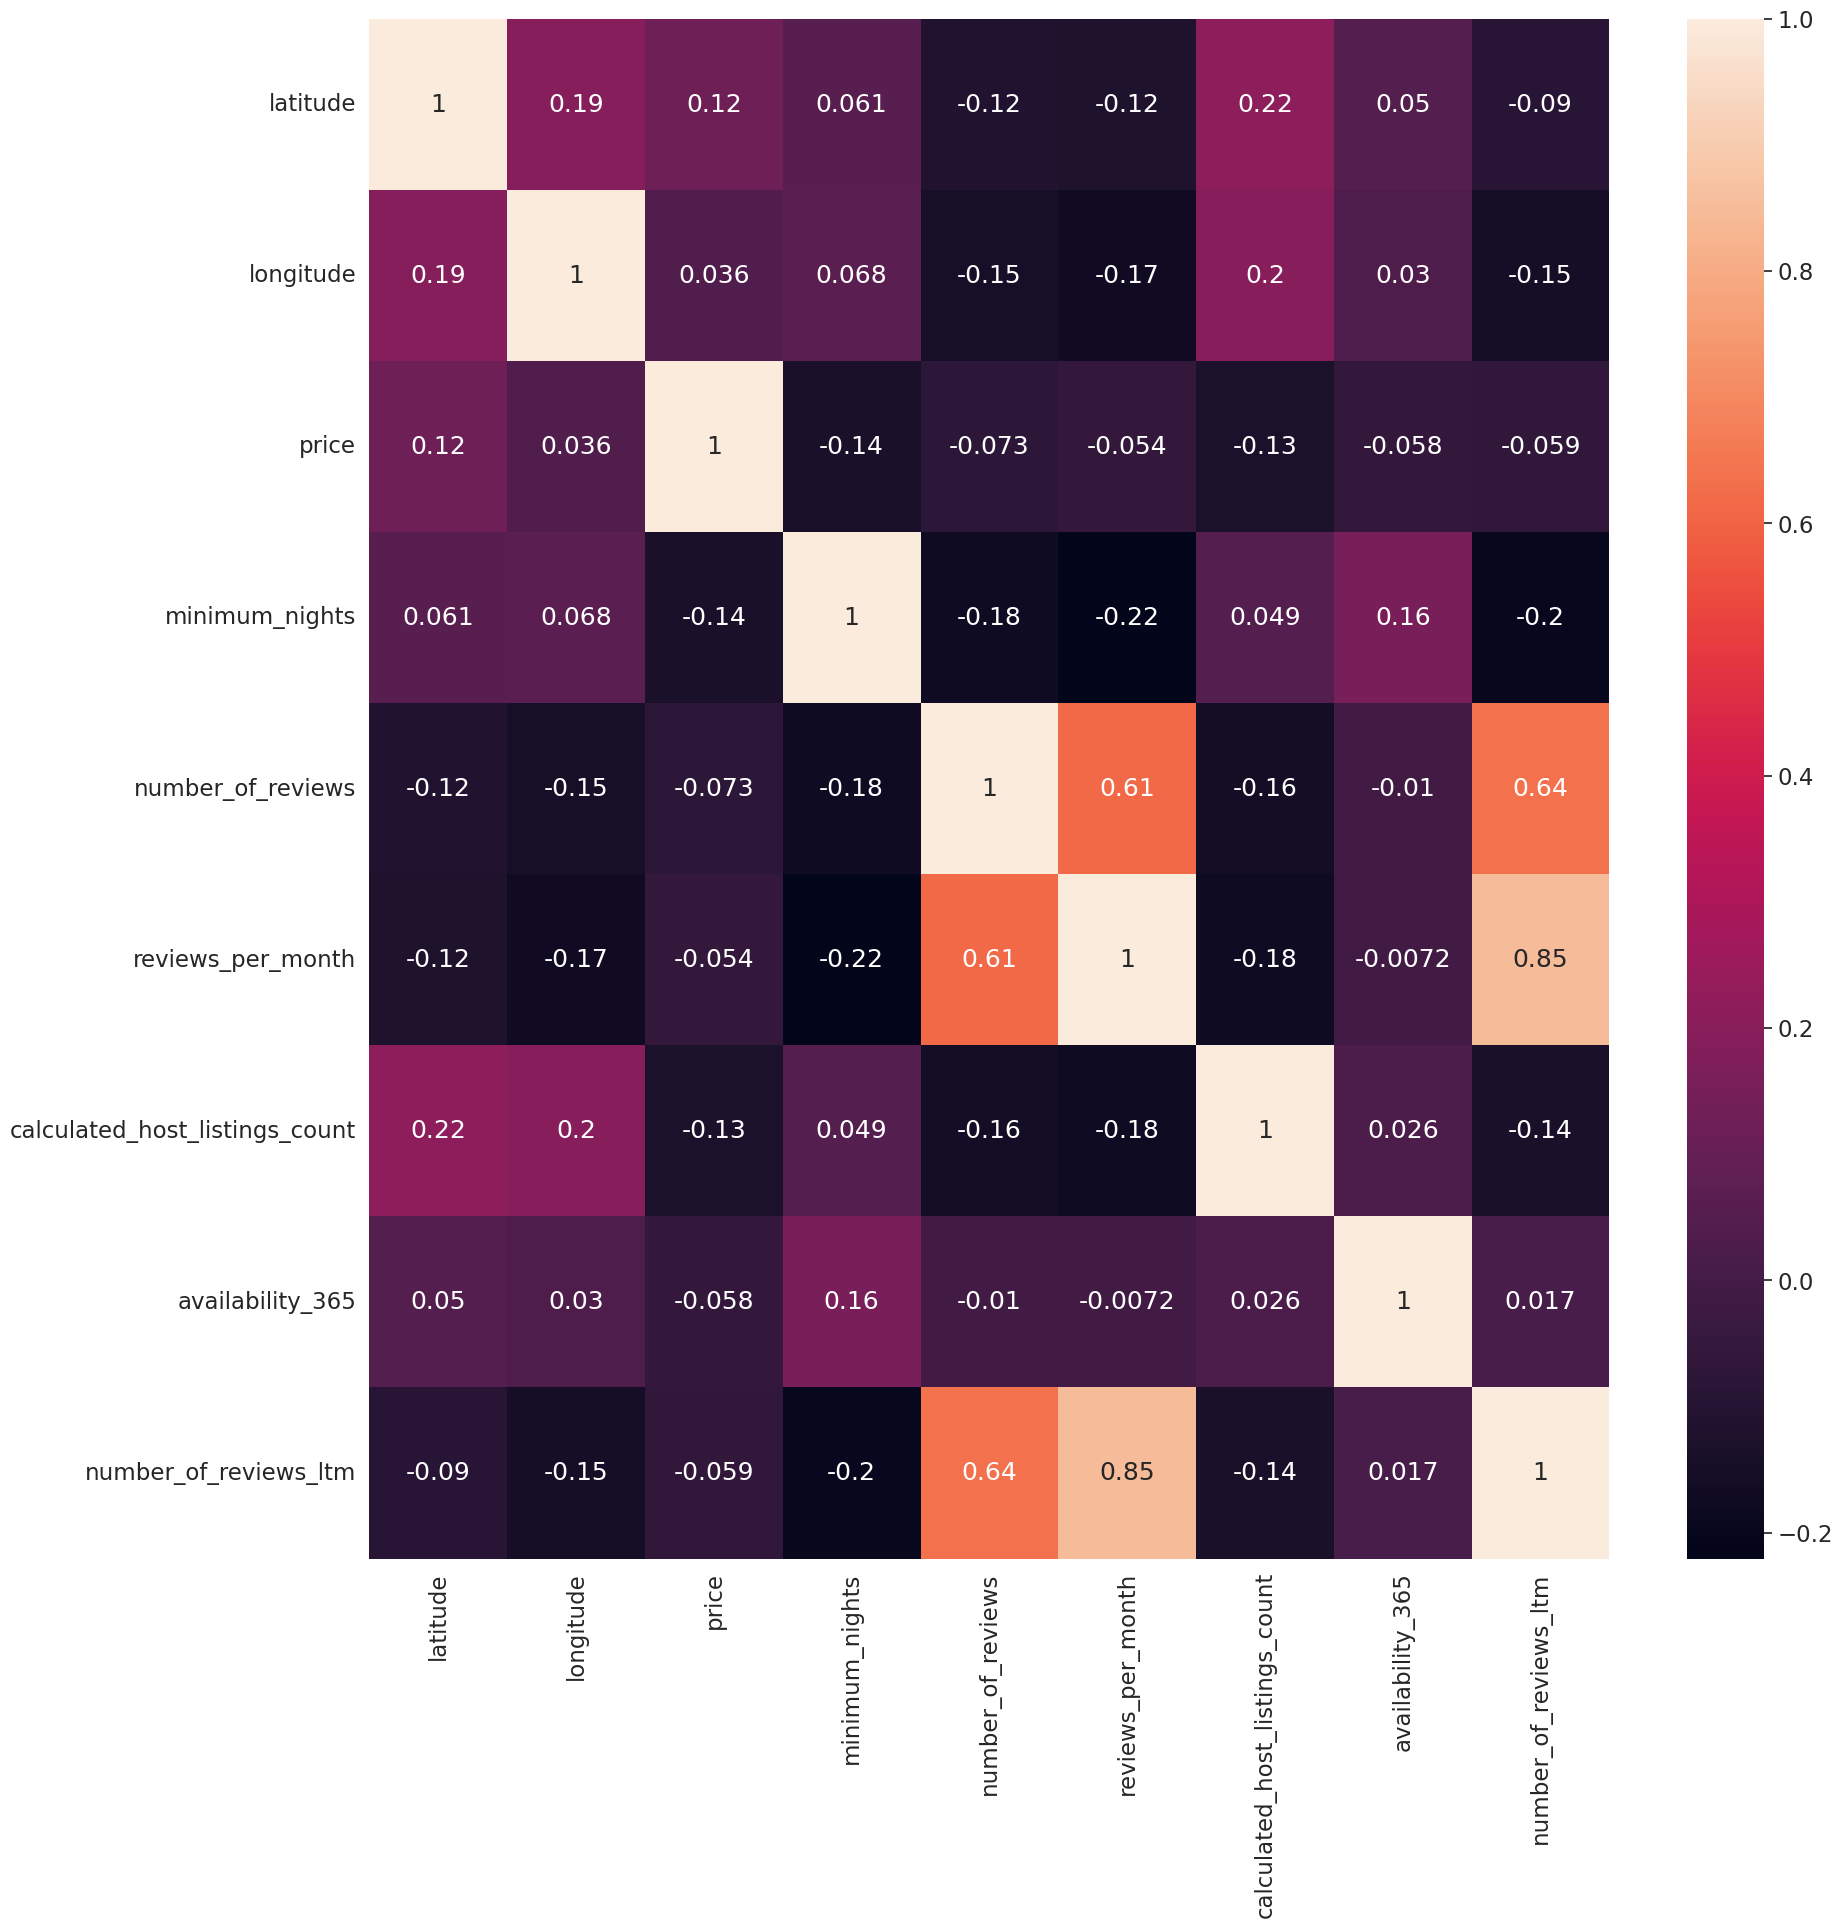

In [50]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(20,20))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Based on the above, I am interested in seeing what variables impact the price of a rental. While the correlations are not very strong, we see that price is most likely correlated based upon "availability_365" (-0.058), "calculated_host_listings_count" (-0.13), and the "reviews_per_month" (-0.054).

Overall, many of the variables have fairly low correlation with one another based on the above table. However, as expected, the number_of_reviews as well as the reviews_per_month are highly correlated with another, which makes obvious sense as they are dependent upon each other.

One thing that may be worth noting is that there is negative correlation between price and minimum_nights. If I'm not mistaken, a negative correlation may imply that as one variable increases, the other would decrease. Based on these results one could infer that as the price increases, the minimum_nights someone stays in an AirBnB would decrease.

***Scatterplots***

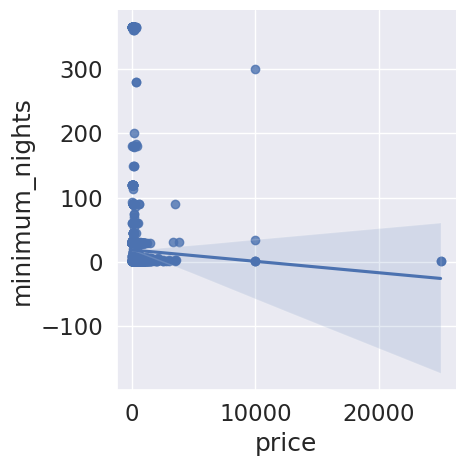

In [53]:
# Creating a scatterplot for price and minimum_nights to determine if there is a negative relationship between the variables 

sns.lmplot(x= 'price', y = 'minimum_nights', data = sf_listings)

In [52]:
# The above graph shows that the price and minimum_nights variables have a negative relationship.
## In theory, as one increases, the other will decrease, i.e. as price increases, the number of minimum_nights should decrease.

Based on the above graph, we also notice that there are significant outliers for both variables.

Within the San Francisco AirBnB dataframe there are some interesting outliers where the max number of minimum_nights is 1,125 with a maximum price of over 25,000 per night. This means that there is at least one listing that requires the AirBnB customer to rent out an apartment for a minimum of 3 years. While this could in theory be a typo, it is also very possible that someone in San Francisco is also renting is for that long of a period while away for some time or using the last several years of their lease to benefit and rent it out via AirBnB while having found another place. San Francisco's rental market is very excessive and out of this world! Moreover, having a place that costs over 25,000 a night means either it is a typo and may be renting out for several weeks or its a very high-end luxury apartment that only a millionaire+ may afford.

***Pair Plots***

In [54]:
# Keeping the variables that have some (albeit low) correlation with price

sub_2 = sub[['price', 'availability_365', 'calculated_host_listings_count', 'reviews_per_month']]

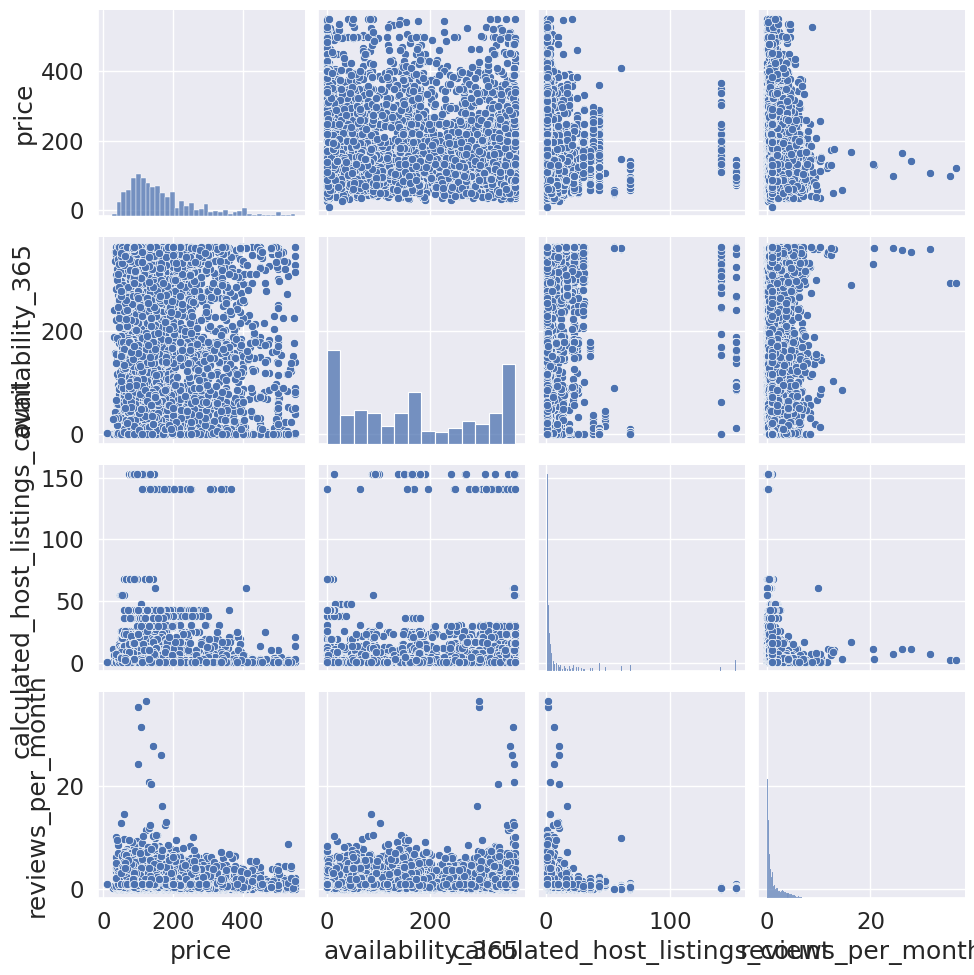

In [55]:
g = sns.pairplot(sub_2)

***Initial observations show that hosts with more listings generally have lower levels of reviews per month, whereas someone with fewer listings will generally have more reviews_per_month. Further, rentals with lower prices have more reviews_per_month, most likely as they are more affordable for the average customer. Overall, the level of availability is broadly the same relative to price, until it reaches an excess of 300+ per night, while availability_365 does not necessarily determine or impact the num_reviews_ltm.***

Based on these results, something that may be interesting to diagnose further is the top 10 hosts in terms of listings and whether they are renting mostly high price range apartments and in which location.

In [56]:
# Checking to ensure host_id and top host are the same
top_10_host = sf_listing_data_95.host_id.value_counts().head(10)
top_10_host

4430421      121
70722023      61
173206762     57
17042045      48
107434423     43
117141107     42
52178915      42
64646820      37
253575857     36
6346492       28
Name: host_id, dtype: int64

In [58]:
top_host_check = sf_listing_data_95.calculated_host_listings_count.max()
top_host_check

153

In [60]:
top_host_df=pd.DataFrame(top_10_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,4430421,121
1,70722023,61
2,173206762,57
3,17042045,48
4,107434423,43
5,117141107,42
6,52178915,42
7,64646820,37
8,253575857,36
9,6346492,28


[Text(0, 0, '4430421'),
 Text(1, 0, '6346492'),
 Text(2, 0, '17042045'),
 Text(3, 0, '52178915'),
 Text(4, 0, '64646820'),
 Text(5, 0, '70722023'),
 Text(6, 0, '107434423'),
 Text(7, 0, '117141107'),
 Text(8, 0, '173206762'),
 Text(9, 0, '253575857')]

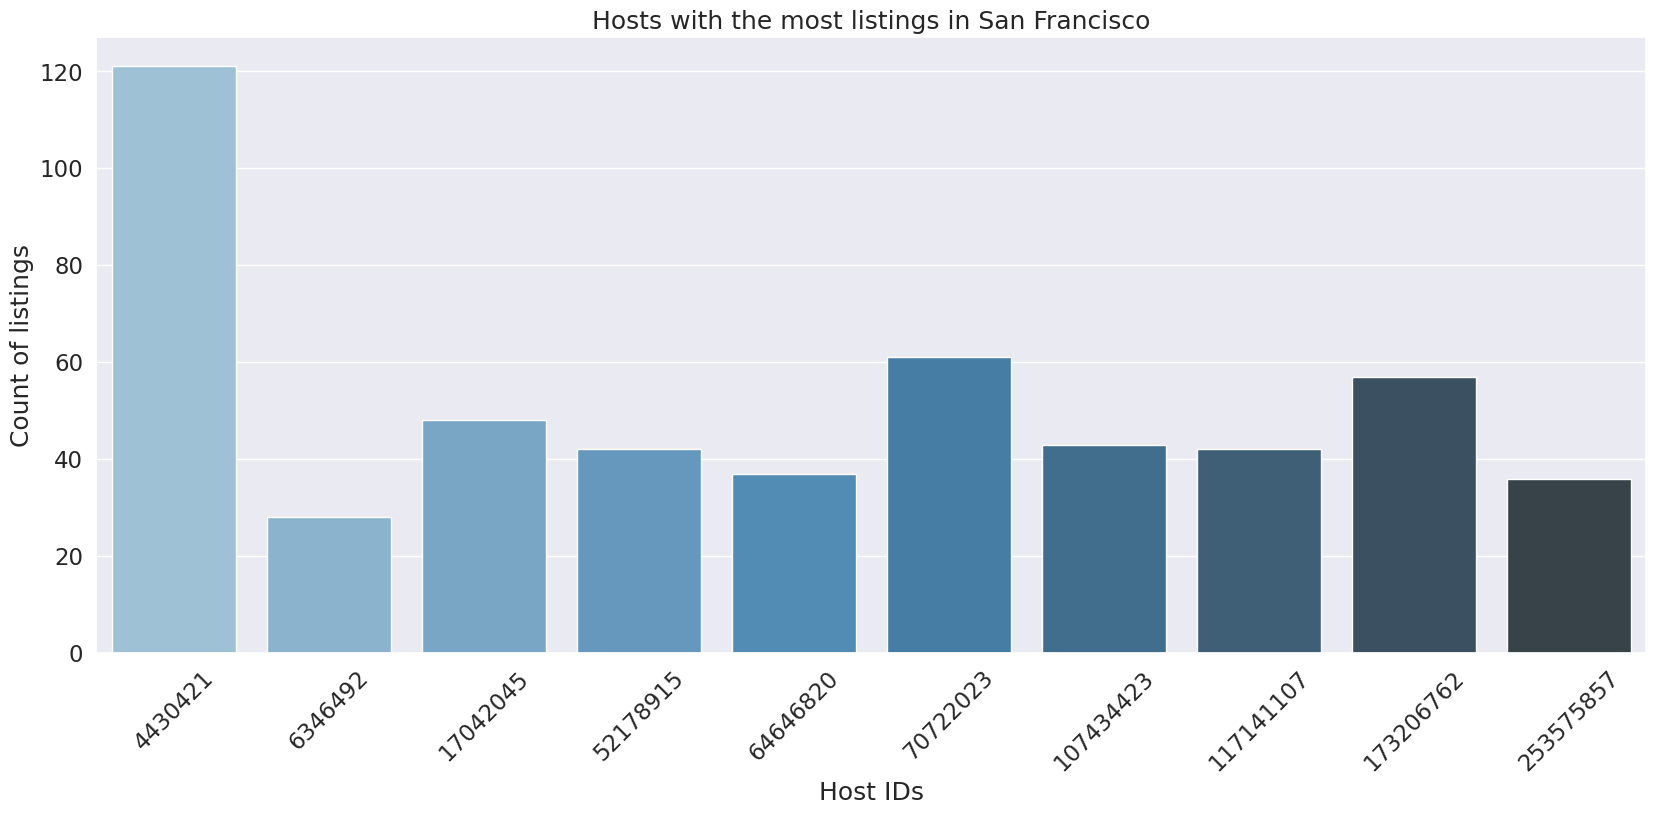

In [62]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in San Francisco')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [63]:
## The above check confirms that the host_id of 4430421 has the most listings on the platform

In [64]:
## I will now run a scatterplot test to measure the level of correlation with the 
## 'calculated_host_listings_count' variable and 'price'

In [65]:
sub_3 = sub[['calculated_host_listings_count', 'price',]]

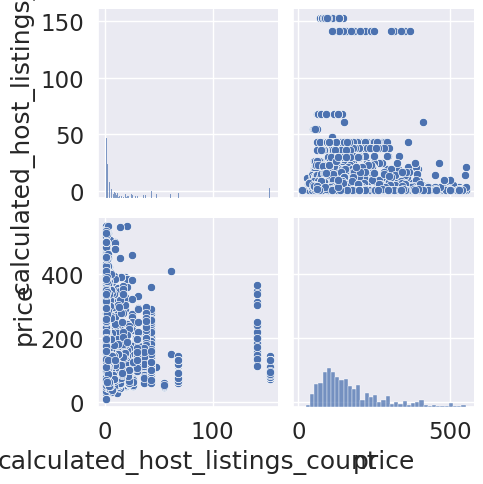

In [66]:
g = sns.pairplot(sub_3)

Based on the above, it appears that while some hosts with more than 100 listings do indeed have lists at the high end of the price range, several hosts seem to be within the mid-range for overnight rentals.

Moreover, based on the dataset available, it appears that I may have to consider other analyses or graphs, such as a bar/density chart to better understand the average price distribution in specific neighborhoods. In a further analysis or task, I may be better set up to create a geographical analysis of which areas are more expensive. Based on these current results and correlation charts/analysis, I have first determined that many of the observations are fairly inconculsive so far.

***Categorical Plots***

***Creating a categorical variable for price into separate categories***

<Axes: xlabel='price', ylabel='Count'>

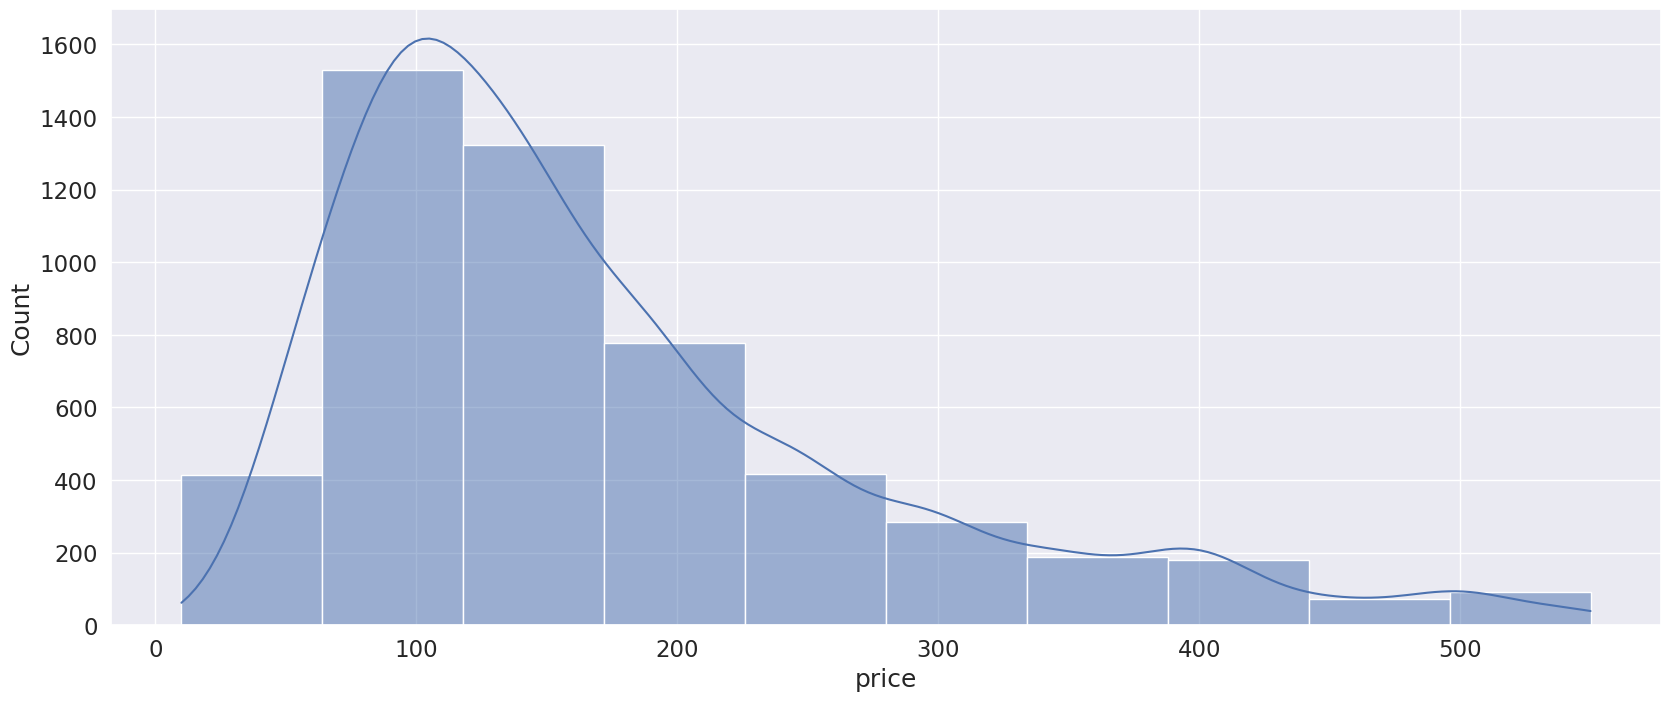

In [67]:
## Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sf_listing_data_95['price'], bins = 10, kde = True)

Based on the above distribution, we can see that the higher price values (although having already removed all values above 500 DOLLARS per night) are still skewing the dataframe somewhat. Ideally, a dataframe would have something closer to a bell curve.

In [69]:
## Determining the quartile ranges of the 'price' variable 

sf_listing_data_95.price.quantile([0.25,0.5,0.75])

0.25     98.0
0.50    143.0
0.75    220.0
Name: price, dtype: float64

In [70]:
sf_listing_data_95.loc[sf_listing_data_95['price'] < 98, 'price_category'] = 'low_price'

In [71]:
sf_listing_data_95.loc[(sf_listing_data_95['price'] >= 98) & (sf_listing_data_95['price'] < 220), 'price_category'] = 'middle_price'

In [72]:
sf_listing_data_95.loc[sf_listing_data_95['price'] >= 220, 'price_category'] = 'high_price'

In [73]:
sf_listing_data_95['price_category'].value_counts(dropna = False)

middle_price    2639
high_price      1342
low_price       1303
Name: price_category, dtype: int64

In [74]:
sf_listing_data_95.columns

Index(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'price_category'],
      dtype='object')

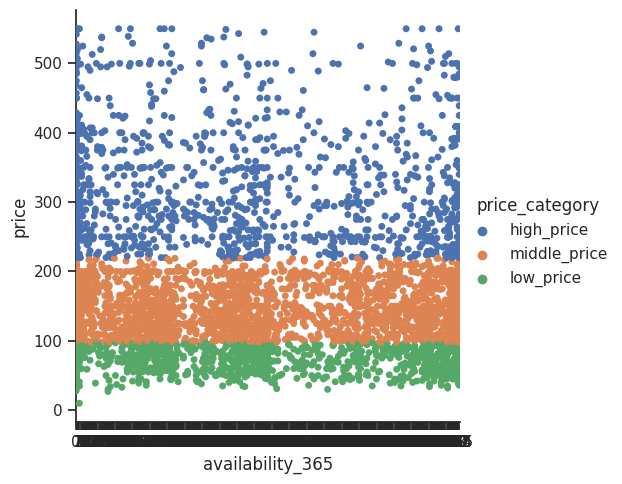

In [75]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="availability_365", y="price", hue="price_category", data=sf_listing_data_95)

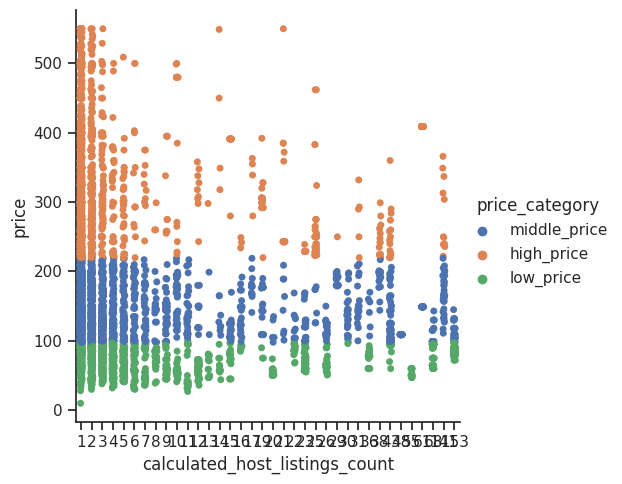

In [76]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="calculated_host_listings_count", y="price", hue="price_category", data=sf_listing_data_95)

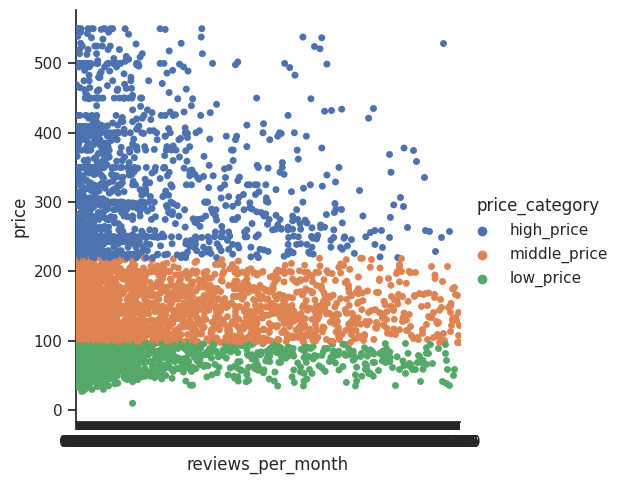

In [77]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="reviews_per_month", y="price", hue="price_category", data=sf_listing_data_95)

***1. What months are busiest in San Francisco? What are the price variations?***

***Busiest Months in San Francisco***

In [78]:
# make new dataframe for number of reviews
rev_freq = pd.DataFrame(sf_reviews['date'].value_counts().values,
                        index=sf_reviews['date'].value_counts().index,
                        columns=['Number of reviews'])

# resample data grouping by year
rev_freq_year = rev_freq.resample('A').sum()
# Print values
rev_freq_year

,Number of reviews
2009-12-31,35
2010-12-31,297
2011-12-31,1042
2012-12-31,2219
2013-12-31,4908
2014-12-31,10640
2015-12-31,16338
2016-12-31,25678
2017-12-31,35069
2018-12-31,44888


In [79]:
#Finding out the earliest and latest review date
sf_reviews['StartDate'] = pd.to_datetime(sf_reviews['date'])
least_recent_date = sf_reviews['StartDate'].min()
recent_date = sf_reviews['StartDate'].max()
print(least_recent_date)
print(recent_date)

2009-05-03 00:00:00
2022-12-03 00:00:00


In [80]:
# Select the year 2021
rev_freq_2021 = rev_freq.loc['2021']
# The review sum per month
rev_2021_month = rev_freq_2021.resample('M').sum()
rev_2021_month['% rev'] = (rev_2021_month['Number of reviews']*100)/rev_2021_month['Number of reviews'].sum()
# Print values
rev_2021_month

,Number of reviews,% rev
2021-01-31,953,2.282525
2021-02-28,1279,3.063326
2021-03-31,2050,4.909944
2021-04-30,2552,6.112282
2021-05-31,3223,7.719391
2021-06-30,3846,9.211535
2021-07-31,4749,11.374305
2021-08-31,5164,12.368270
2021-09-30,4588,10.988695
2021-10-31,4574,10.955164


In [81]:
def bar_plot(X,Y,x_label,y_label,title) :
    """
    Description: This function can be used to plot bar plots.

    Arguments:
    X = values to be plotted on x-axis
    Y = values to be plotted on y-axis
    x_label = Label to be placed near x-axis
    y_label = Label to be placed near y-axis
    title = title of plot

    Returns:
    None
    """ 
# Bar plot
    fig1 = plt.figure(figsize=(10, 5))
    ax = fig1.add_subplot(1, 1, 1, aspect='auto')
    sns.barplot(x=X, y=Y)

# Set axis label properties
    ax.set_xlabel(x_label, weight='normal', size=20)
    ax.set_ylabel(y_label, weight='normal', size=20)
    plt.title(title, fontsize=20)

# Set tick label properties
    ax.tick_params('x', labelsize=15, rotation=35)
    ax.tick_params('y', labelsize=15)
    plt.show()

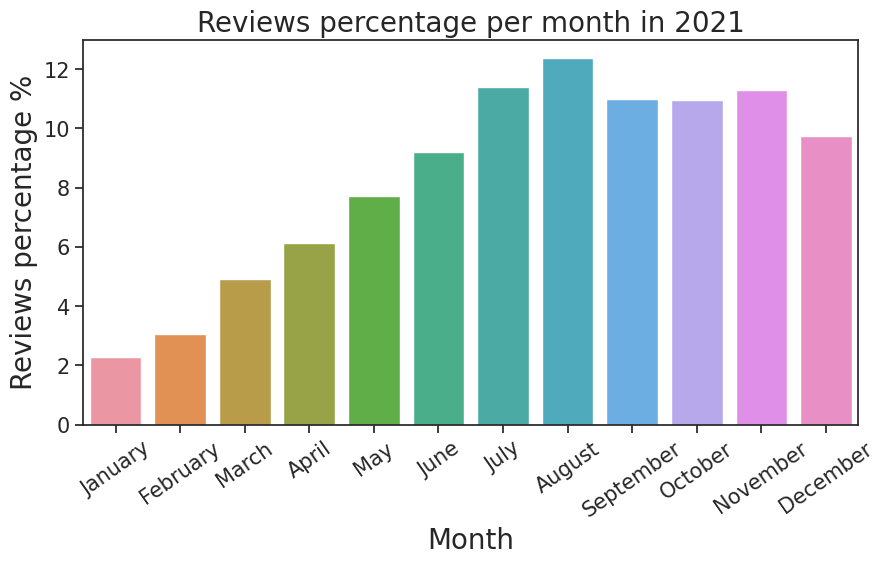

In [82]:
bar_plot(rev_2021_month.index.month_name(),rev_2021_month['% rev'],'Month','Reviews percentage %',
         'Reviews percentage per month in 2021')

In [83]:
# Select the year 2022
rev_freq_2022 = rev_freq.loc['2022']
# The review sum per month
rev_2022_month = rev_freq_2022.resample('M').sum()
rev_2022_month['% rev'] = (rev_2022_month['Number of reviews']*100)/rev_2022_month['Number of reviews'].sum()
# Print values
rev_2022_month

,Number of reviews,% rev
2022-01-31,3832,5.602175
2022-02-28,4169,6.094851
2022-03-31,5435,7.945674
2022-04-30,5940,8.683957
2022-05-31,7132,10.426596
2022-06-30,6962,10.178065
2022-07-31,7122,10.411976
2022-08-31,7796,11.397328
2022-09-30,7699,11.255519
2022-10-31,7207,10.536242


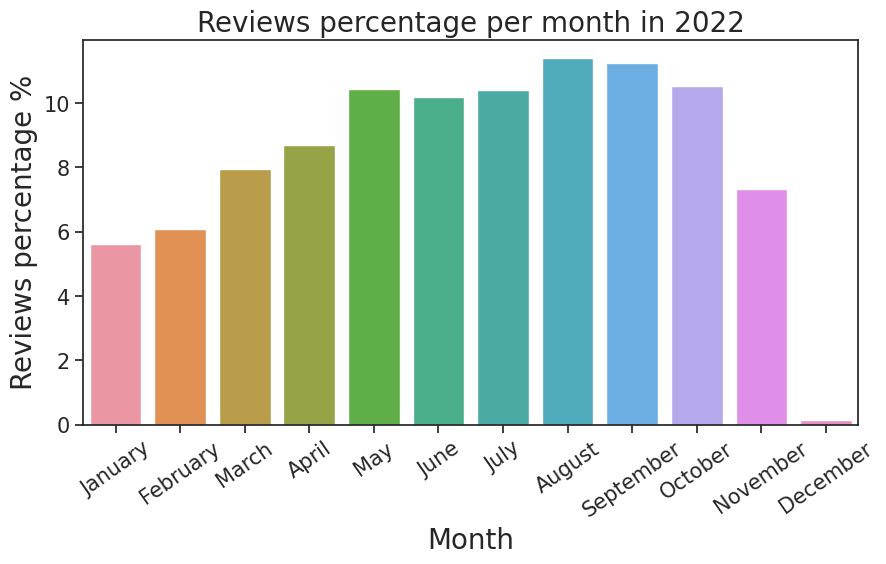

In [84]:
bar_plot(rev_2022_month.index.month_name(),rev_2022_month['% rev'],'Month','Reviews percentage %',
         'Reviews percentage per month in 2022')

***Result : August, September and October are the busiest months.***

***Price Variations***

In [85]:
#Remove all rows which have 0 for availibility as they cannot influence price
sf_calendar_copy = sf_calendar.copy()
sf_calendar_copy = sf_calendar_copy[sf_calendar_copy['available']==1]

In [86]:
# Number of price listings per year
freq_cal = pd.DataFrame(sf_calendar_copy['date'].value_counts().values,
                        index=sf_calendar_copy['date'].value_counts().index,
                        columns=['Frequency of Price'])
freq_year_cal = freq_cal.resample('A').sum()
# Print values
freq_year_cal

,Frequency of Price
2022-12-31,81537
2023-12-31,1093796


In [87]:
#start and end date of entries in calendar.csv
sf_calendar_copy['StartDate'] = pd.to_datetime(sf_calendar_copy['date'])
least_recent_date = sf_calendar_copy['StartDate'].min()
recent_date = sf_calendar_copy['StartDate'].max()
print(least_recent_date)
print(recent_date)

2022-12-04 00:00:00
2023-12-03 00:00:00


In [88]:
# Index data by date
sf_calendar_copy.index = sf_calendar_copy['date']

# Get data for 2023
sf_calendar_2023 = sf_calendar_copy.loc['2023']

# Percentage of missing values
sf_calendar_2023.isnull().mean()

listing_id        0.000000e+00
date              0.000000e+00
available         0.000000e+00
price             6.610008e-04
minimum_nights    9.142473e-07
maximum_nights    9.142473e-07
StartDate         0.000000e+00
dtype: float64

In [89]:
sf_calendar_2023.isnull().sum()

listing_id          0
date                0
available           0
price             723
minimum_nights      1
maximum_nights      1
StartDate           0
dtype: int64

In [90]:
6.610008e-04

0.0006610008

In [91]:
# Drop rows with missing price values as there are 723 missing values
sf_calendar_2023_c = sf_calendar_2023.dropna()

# Preprocess the price variable
sf_calendar_2023_c['price'] = sf_calendar_2023_c['price'].apply(
    lambda x: float(x[1:].replace(',', '')))

In [92]:
# The price
print("Price min : ",  sf_calendar_2023_c['price'].min())
print("Price max : ",  sf_calendar_2023_c['price'].max())
print("Price mean : ", sf_calendar_2023_c['price'].mean())

Price min :  27.0
Price max :  94106.0
Price mean :  375.09954513517863


In [93]:
sf_calendar_2023_c.describe()

,listing_id,available,price,minimum_nights,maximum_nights
count,1.093072e+06,1093072.0,1.093072e+06,1.093072e+06,1.093072e+06
mean,1.406790e+17,1.0,3.750995e+02,3.814896e+01,7.961688e+06
std,2.757909e+17,0.0,1.313879e+03,8.226594e+01,1.305070e+08
min,9.580000e+02,1.0,2.700000e+01,1.000000e+00,1.000000e+00
25%,1.719272e+07,1.0,1.050000e+02,2.000000e+00,1.820000e+02
50%,3.774537e+07,1.0,1.620000e+02,3.000000e+01,1.125000e+03
75%,5.256924e+07,1.0,2.750000e+02,3.000000e+01,1.125000e+03
max,7.734981e+17,1.0,9.410600e+04,1.125000e+03,2.147484e+09


In [94]:
9.410600e+04

94106.0

In [95]:
1.125000e+03

1125.0

In [96]:
2.147484e+09

2147484000.0

In [97]:
sf_calendar_2023_c = sf_calendar_2023_c[sf_calendar_2023_c.price > 0]
sf_calendar_2023_c.shape

(1093072, 7)

In [98]:
sf_calendar_2023_c = sf_calendar_2023_c[sf_calendar_2023_c.minimum_nights <= 365]
sf_calendar_2023_c.shape

(1091725, 7)

In [99]:
sf_calendar_2023_c = sf_calendar_2023_c[sf_calendar_2023_c.maximum_nights <= 365]
sf_calendar_2023_c.shape

(460740, 7)

<Axes: ylabel='Frequency'>

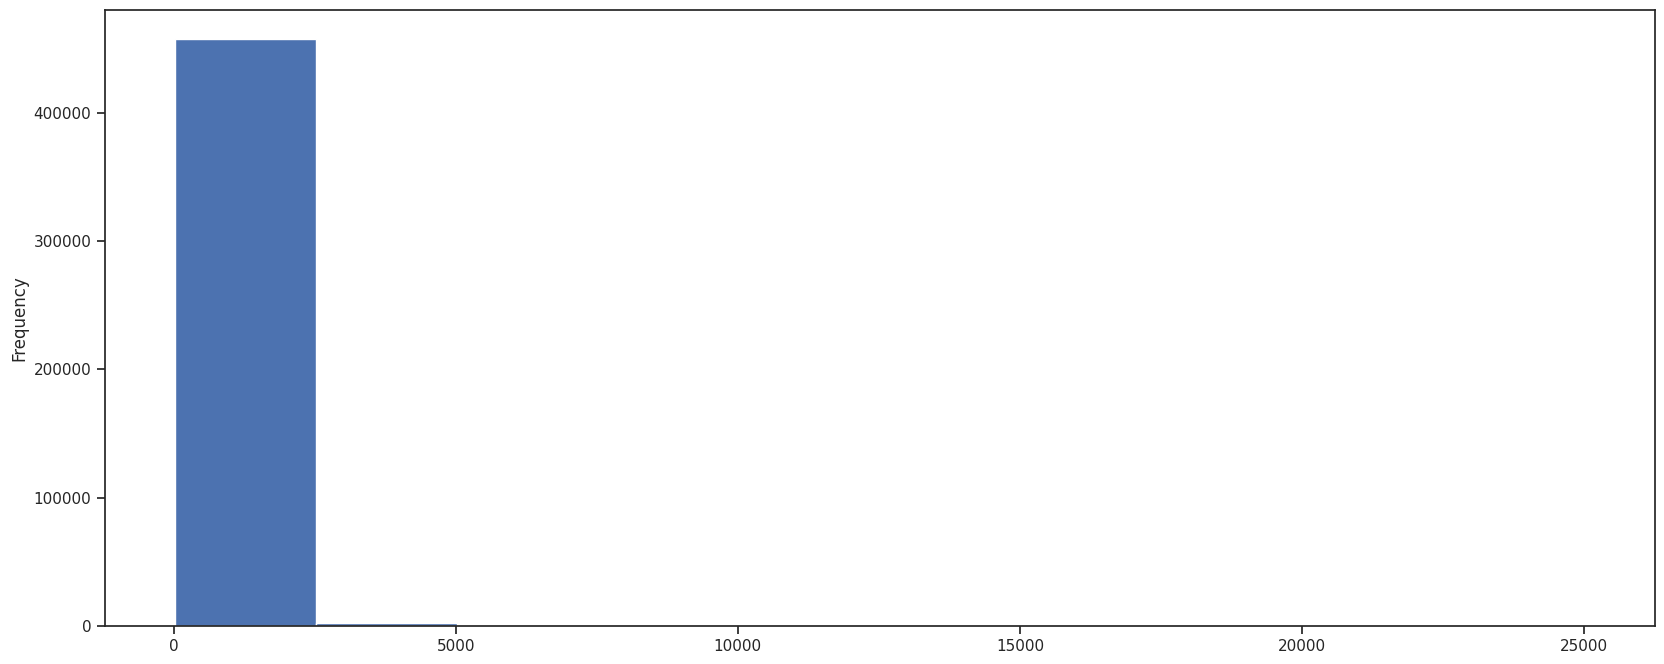

In [100]:
sf_calendar_2023_c["price"].plot(kind="hist")

In [101]:
np.percentile(sf_calendar_2023_c["price"],95)

659.0

In [102]:
sf_calendar_2023_c['price'].max()

25000.0

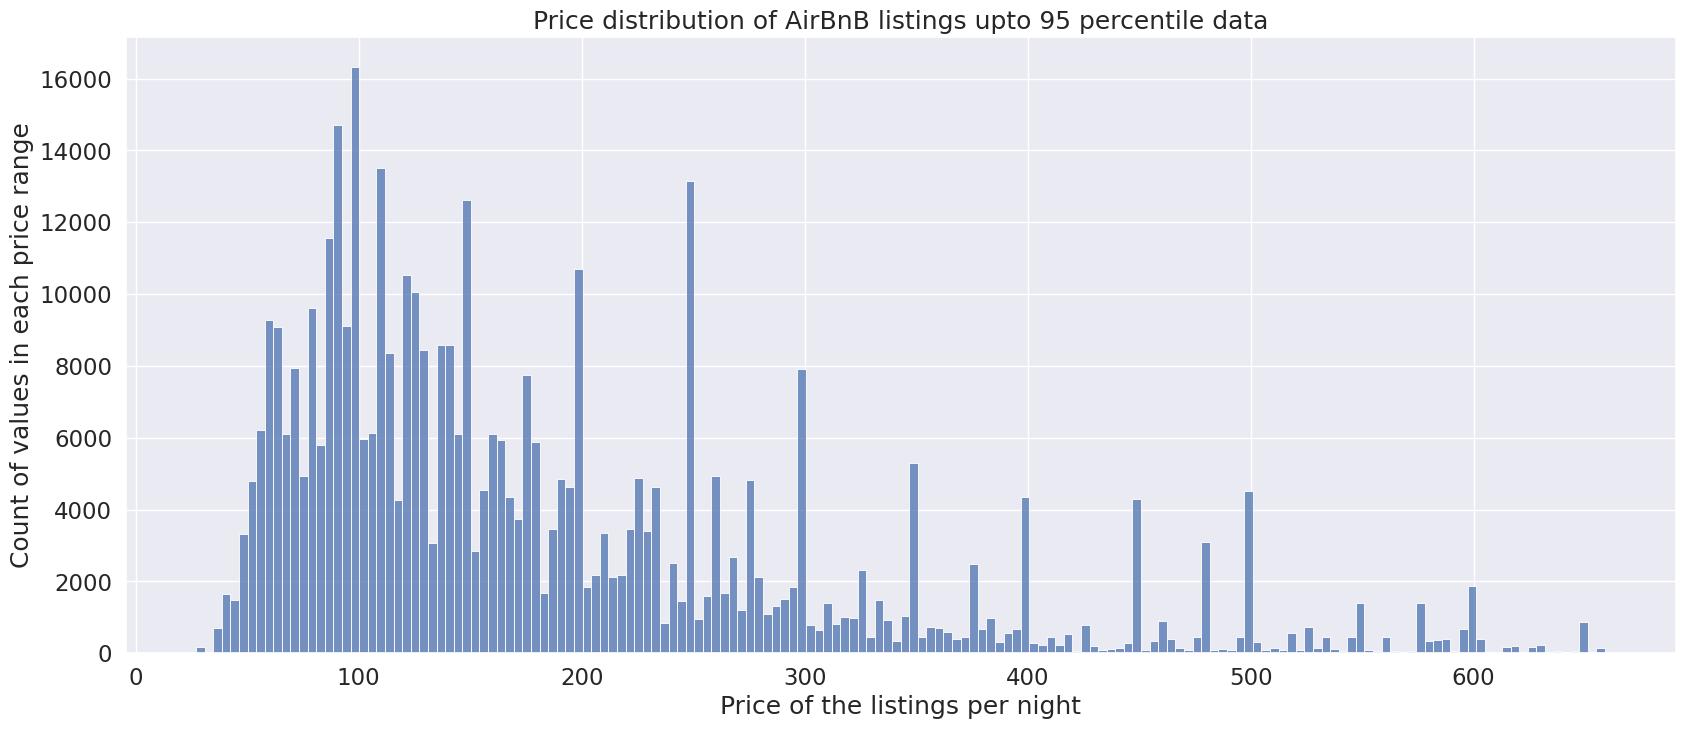

In [103]:
#Considering the 95 percentile data of price
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.5)
sns.histplot(sf_calendar_2023_c[sf_calendar_2023_c["price"]<=659]["price"],kde=False)
plt.title("Price distribution of AirBnB listings upto 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

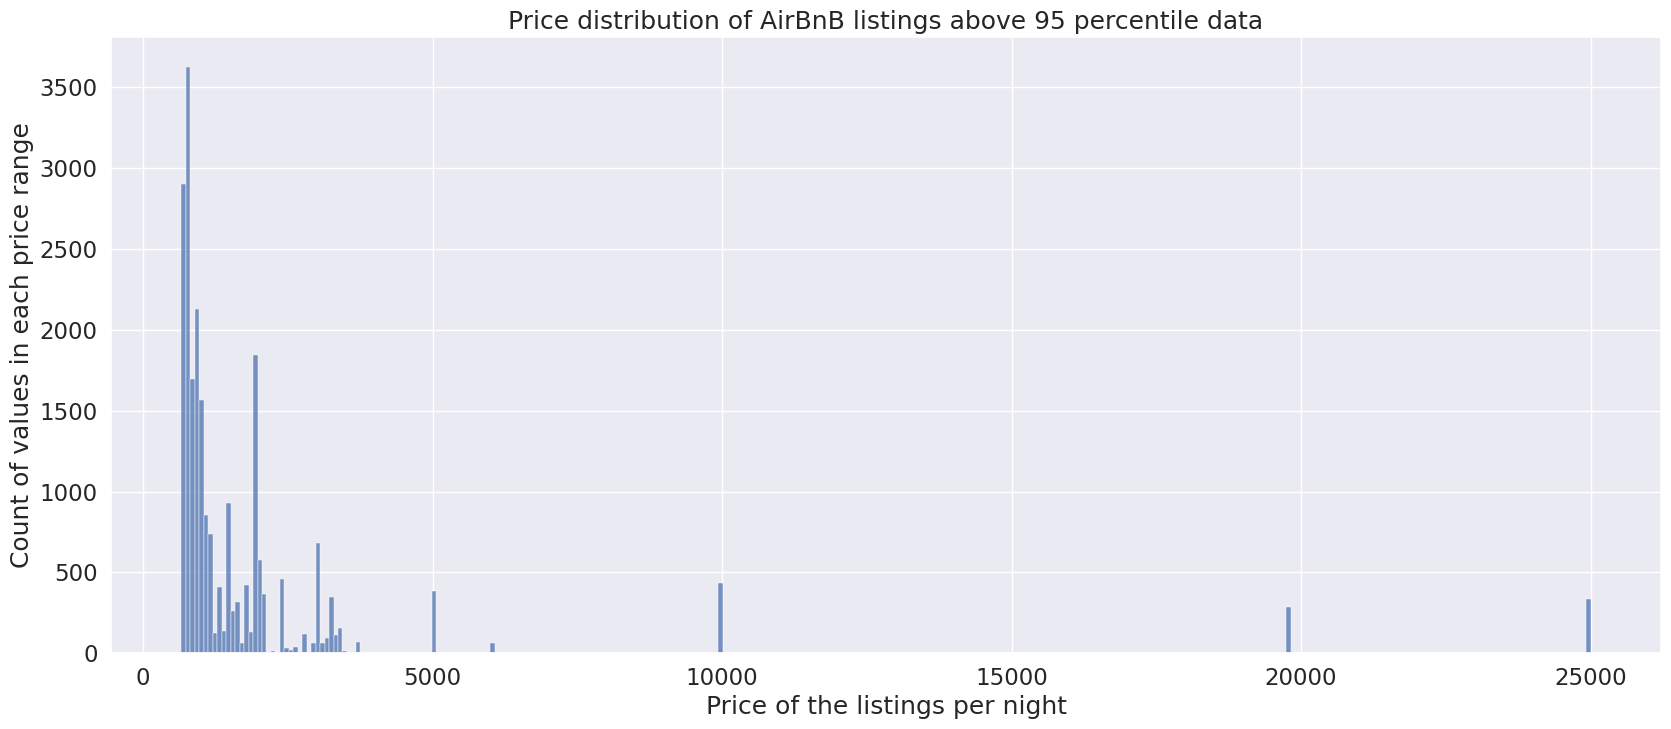

In [104]:
sns.histplot(sf_calendar_2023_c[sf_calendar_2023_c["price"]>659]["price"],kde=False)
plt.title("Price distribution of AirBnB listings above 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

In [105]:
sf_calendar_2023_c_data_95 = sf_calendar_2023_c[sf_calendar_2023_c["price"]<=np.percentile(sf_calendar_2023_c["price"],95)]

In [106]:
## Determining the quartile ranges of the 'price' variable 

sf_calendar_2023_c_data_95.price.quantile([0.25,0.5,0.75])

0.25     98.0
0.50    149.0
0.75    245.0
Name: price, dtype: float64

In [107]:
sf_calendar_2023_c_data_95.describe()

,listing_id,available,price,minimum_nights,maximum_nights
count,4.377830e+05,437783.0,437783.000000,437783.000000,437783.000000
mean,2.088118e+17,1.0,186.576244,21.951725,179.587177
std,3.138822e+17,0.0,123.502079,37.708873,147.714151
min,5.858000e+03,1.0,27.000000,1.000000,1.000000
25%,1.849224e+07,1.0,98.000000,2.000000,29.000000
50%,4.194167e+07,1.0,149.000000,30.000000,150.000000
75%,6.094467e+17,1.0,245.000000,30.000000,365.000000
max,7.734981e+17,1.0,659.000000,365.000000,365.000000


In [108]:
sf_calendar_2023_c_data_95 = sf_calendar_2023_c_data_95[['price','available']]

# Print the first five rows
sf_calendar_2023_c_data_95.head()

,price,available
date,,
2023-01-07,55.0,1
2023-01-12,55.0,1
2023-01-14,55.0,1
2023-01-18,55.0,1
2023-01-20,55.0,1


In [109]:
# Resemple data by month
df_2023_month = sf_calendar_2023_c_data_95.resample('M').mean()
# difference between the price mean per month and the price mean
df_2023_month['diff mean'] = df_2023_month['price'] \
    - sf_calendar_2023_c_data_95['price'].mean()

# Print data
df_2023_month

,price,available,diff mean
date,,,
2023-01-31,179.817039,1.0,-6.759205
2023-02-28,179.369824,1.0,-7.206421
2023-03-31,177.484135,1.0,-9.092109
2023-04-30,181.412359,1.0,-5.163886
2023-05-31,185.448303,1.0,-1.127941
2023-06-30,193.114144,1.0,6.537900
2023-07-31,195.478514,1.0,8.902270
2023-08-31,193.614537,1.0,7.038293
2023-09-30,195.181923,1.0,8.605678


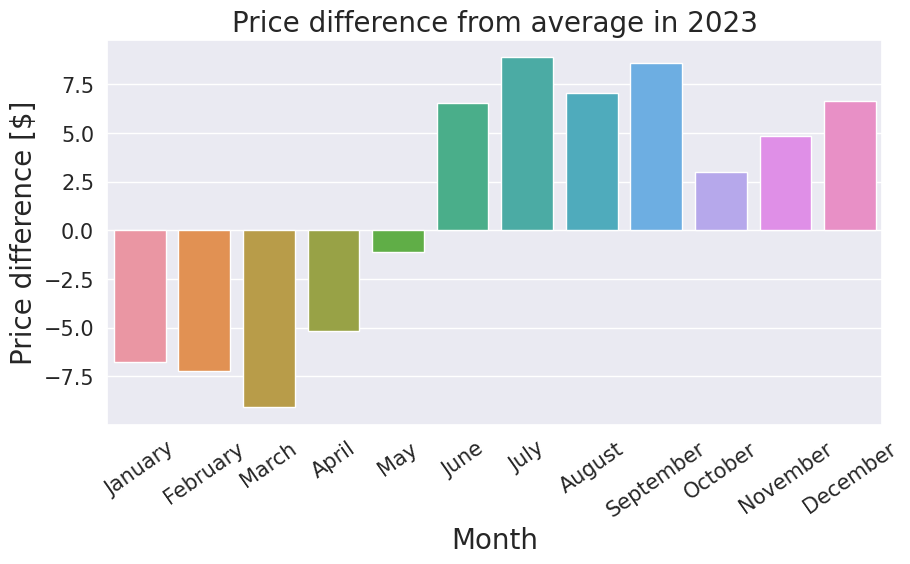

In [110]:
bar_plot(df_2023_month.index.month_name(),df_2023_month['diff mean'],'Month','Price difference [$]',
         'Price difference from average in 2023')

***Result : July, August and September are the most expensive months. January,February and March are least expensive.***

***2. What types of rooms are available? What is the price difference according to room type?***

In [111]:
#availability per room type
sf_listing_data_95.room_type.value_counts()
sf_houses = sf_listing_data_95.groupby(['room_type']).mean()['availability_365'].sort_values()
print(sf_houses)

room_type
Shared room        156.692308
Entire home/apt    164.703148
Private room       177.832881
Hotel room         259.648148
Name: availability_365, dtype: float64


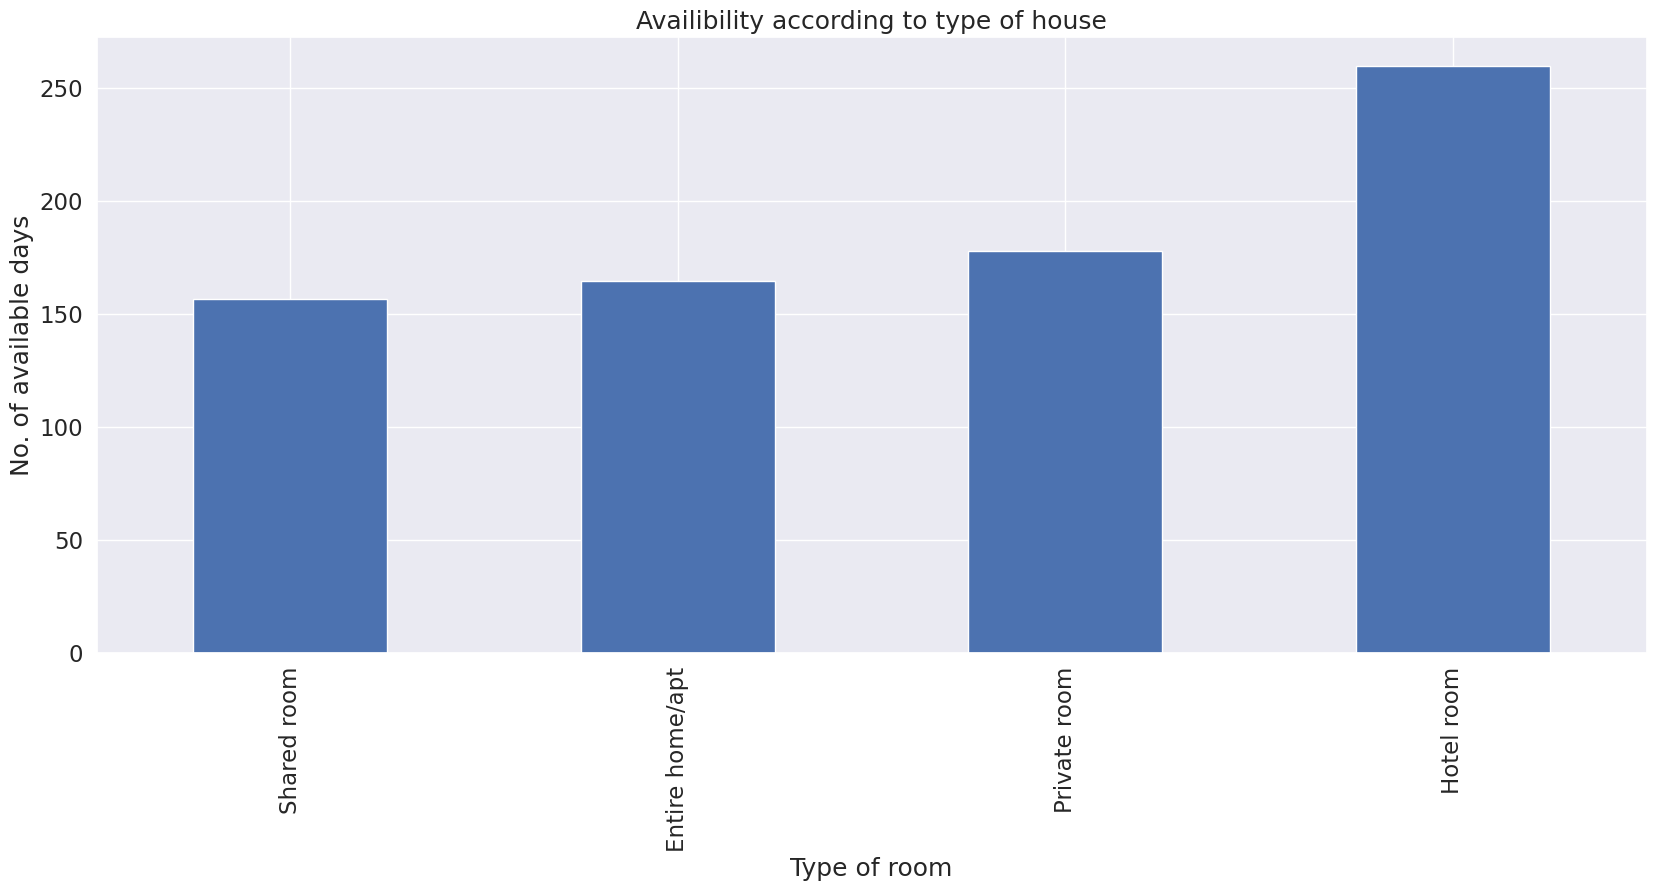

In [112]:
#plot availability vs room_type
sf_houses.plot(kind="bar");
plt.xlabel("Type of room")
plt.ylabel("No. of available days")
plt.title("Availibility according to type of house");

In [113]:
#checking if room_type has missing values
sf_listing_data_95.isnull().mean()

id                                0.0
host_id                           0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
price_category                    0.0
dtype: float64

room_type
Shared room         88.576923
Private room       124.768313
Entire home/apt    201.035982
Hotel room         204.555556
Name: price, dtype: float64


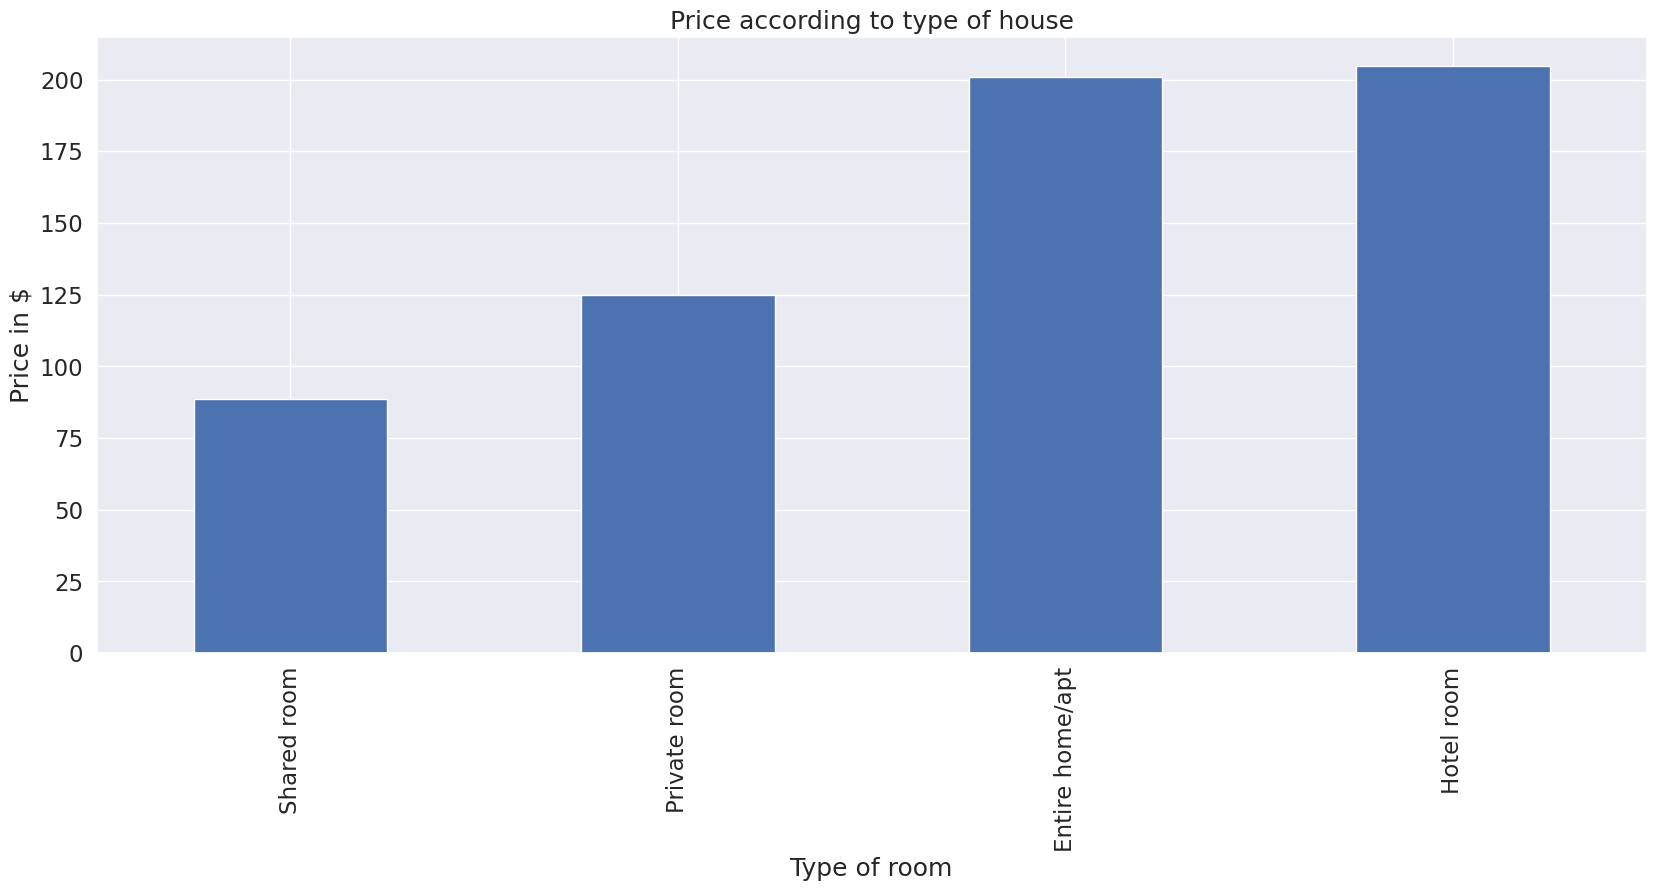

In [114]:
#average price per room type
sf_houses_price = sf_listing_data_95.groupby(['room_type']).mean()['price'].sort_values()
print(sf_houses_price)
sf_houses_price.plot(kind="bar");
plt.xlabel("Type of room")
plt.ylabel("Price in $")
plt.title("Price according to type of house");

***Result : Hotel room has highest availability and highest price. Next highest listings and prices are for Private room and Entire home/apt. Shared room has lowest availability and lowest price.***

***3. Which neighbourhood has most listings? Is price related to the number of listings in that neighbourhood?***

In [115]:
#Number of listings per neighborhood
sf_listing_data_95['neighbourhood'].value_counts()

Downtown/Civic Center    626
Mission                  484
Western Addition         339
South of Market          325
Outer Sunset             265
Bernal Heights           255
Castro/Upper Market      230
Haight Ashbury           230
Nob Hill                 228
Noe Valley               190
Outer Richmond           152
Inner Richmond           149
Marina                   145
Excelsior                144
Bayview                  140
Parkside                 124
Potrero Hill             118
Inner Sunset             116
Outer Mission            104
Pacific Heights          104
Russian Hill              99
North Beach               93
Chinatown                 92
Financial District        89
West of Twin Peaks        87
Ocean View                81
Visitacion Valley         58
Glen Park                 46
Lakeshore                 46
Twin Peaks                39
Crocker Amazon            37
Presidio Heights          24
Diamond Heights            9
Presidio                   7
Seacliff      

***Which neighbourhood has most availibility?***

In [116]:
#available days per neighborhood
sf_listings_avail = sf_listing_data_95.groupby(['neighbourhood']).mean()['availability_365'].sort_values()
sf_listings_avail

neighbourhood
Bernal Heights           129.576471
Seacliff                 135.000000
Diamond Heights          136.333333
Downtown/Civic Center    147.931310
Castro/Upper Market      152.682609
Mission                  153.710744
Haight Ashbury           153.878261
Outer Richmond           154.414474
Noe Valley               154.542105
Outer Sunset             157.943396
Potrero Hill             162.042373
Visitacion Valley        162.706897
Parkside                 163.516129
Russian Hill             164.555556
Western Addition         164.958702
Bayview                  168.242857
Presidio Heights         172.875000
Inner Richmond           173.570470
Inner Sunset             173.758621
Glen Park                179.021739
Lakeshore                179.478261
Ocean View               181.407407
Excelsior                184.798611
West of Twin Peaks       186.080460
Crocker Amazon           186.162162
Chinatown                188.663043
Twin Peaks               189.179487
Marina        

***Price variability with neighbourhood***

In [117]:
#average price per neighborhood
sf_listing_data_95.groupby(['neighbourhood']).mean()['price'].sort_values()

neighbourhood
Crocker Amazon           100.351351
Ocean View               109.283951
Excelsior                113.034722
Bayview                  128.392857
Visitacion Valley        129.465517
Lakeshore                131.521739
Outer Sunset             137.260377
Outer Mission            140.865385
Nob Hill                 153.837719
Parkside                 155.241935
Golden Gate Park         162.333333
Downtown/Civic Center    165.329073
West of Twin Peaks       166.379310
Inner Sunset             166.543103
Financial District       169.741573
South of Market          170.581538
Mission                  172.522727
Outer Richmond           178.368421
Western Addition         179.902655
Bernal Heights           187.015686
Haight Ashbury           187.573913
Pacific Heights          188.701923
Inner Richmond           189.993289
Chinatown                190.782609
Marina                   196.455172
Noe Valley               200.994737
North Beach              212.408602
Potrero Hill  

                        diff_mean
neighbourhood                    
Crocker Amazon         -73.012577
Ocean View             -64.079978
Excelsior              -60.329207
Bayview                -44.971072
Visitacion Valley      -43.898412
Lakeshore              -41.842190
Outer Sunset           -36.103551
Outer Mission          -32.498544
Nob Hill               -19.526210
Parkside               -18.121993
Golden Gate Park       -11.030596
Downtown/Civic Center   -8.034855
West of Twin Peaks      -6.984618
Inner Sunset            -6.820825
Financial District      -3.622356
South of Market         -2.782390
Mission                 -0.841202
Outer Richmond           5.004492
Western Addition         6.538726
Bernal Heights          13.651757
Haight Ashbury          14.209984
Pacific Heights         15.337994
Inner Richmond          16.629360
Chinatown               17.418680
Marina                  23.091244
Noe Valley              27.630808
North Beach             39.044673
Potrero Hill  

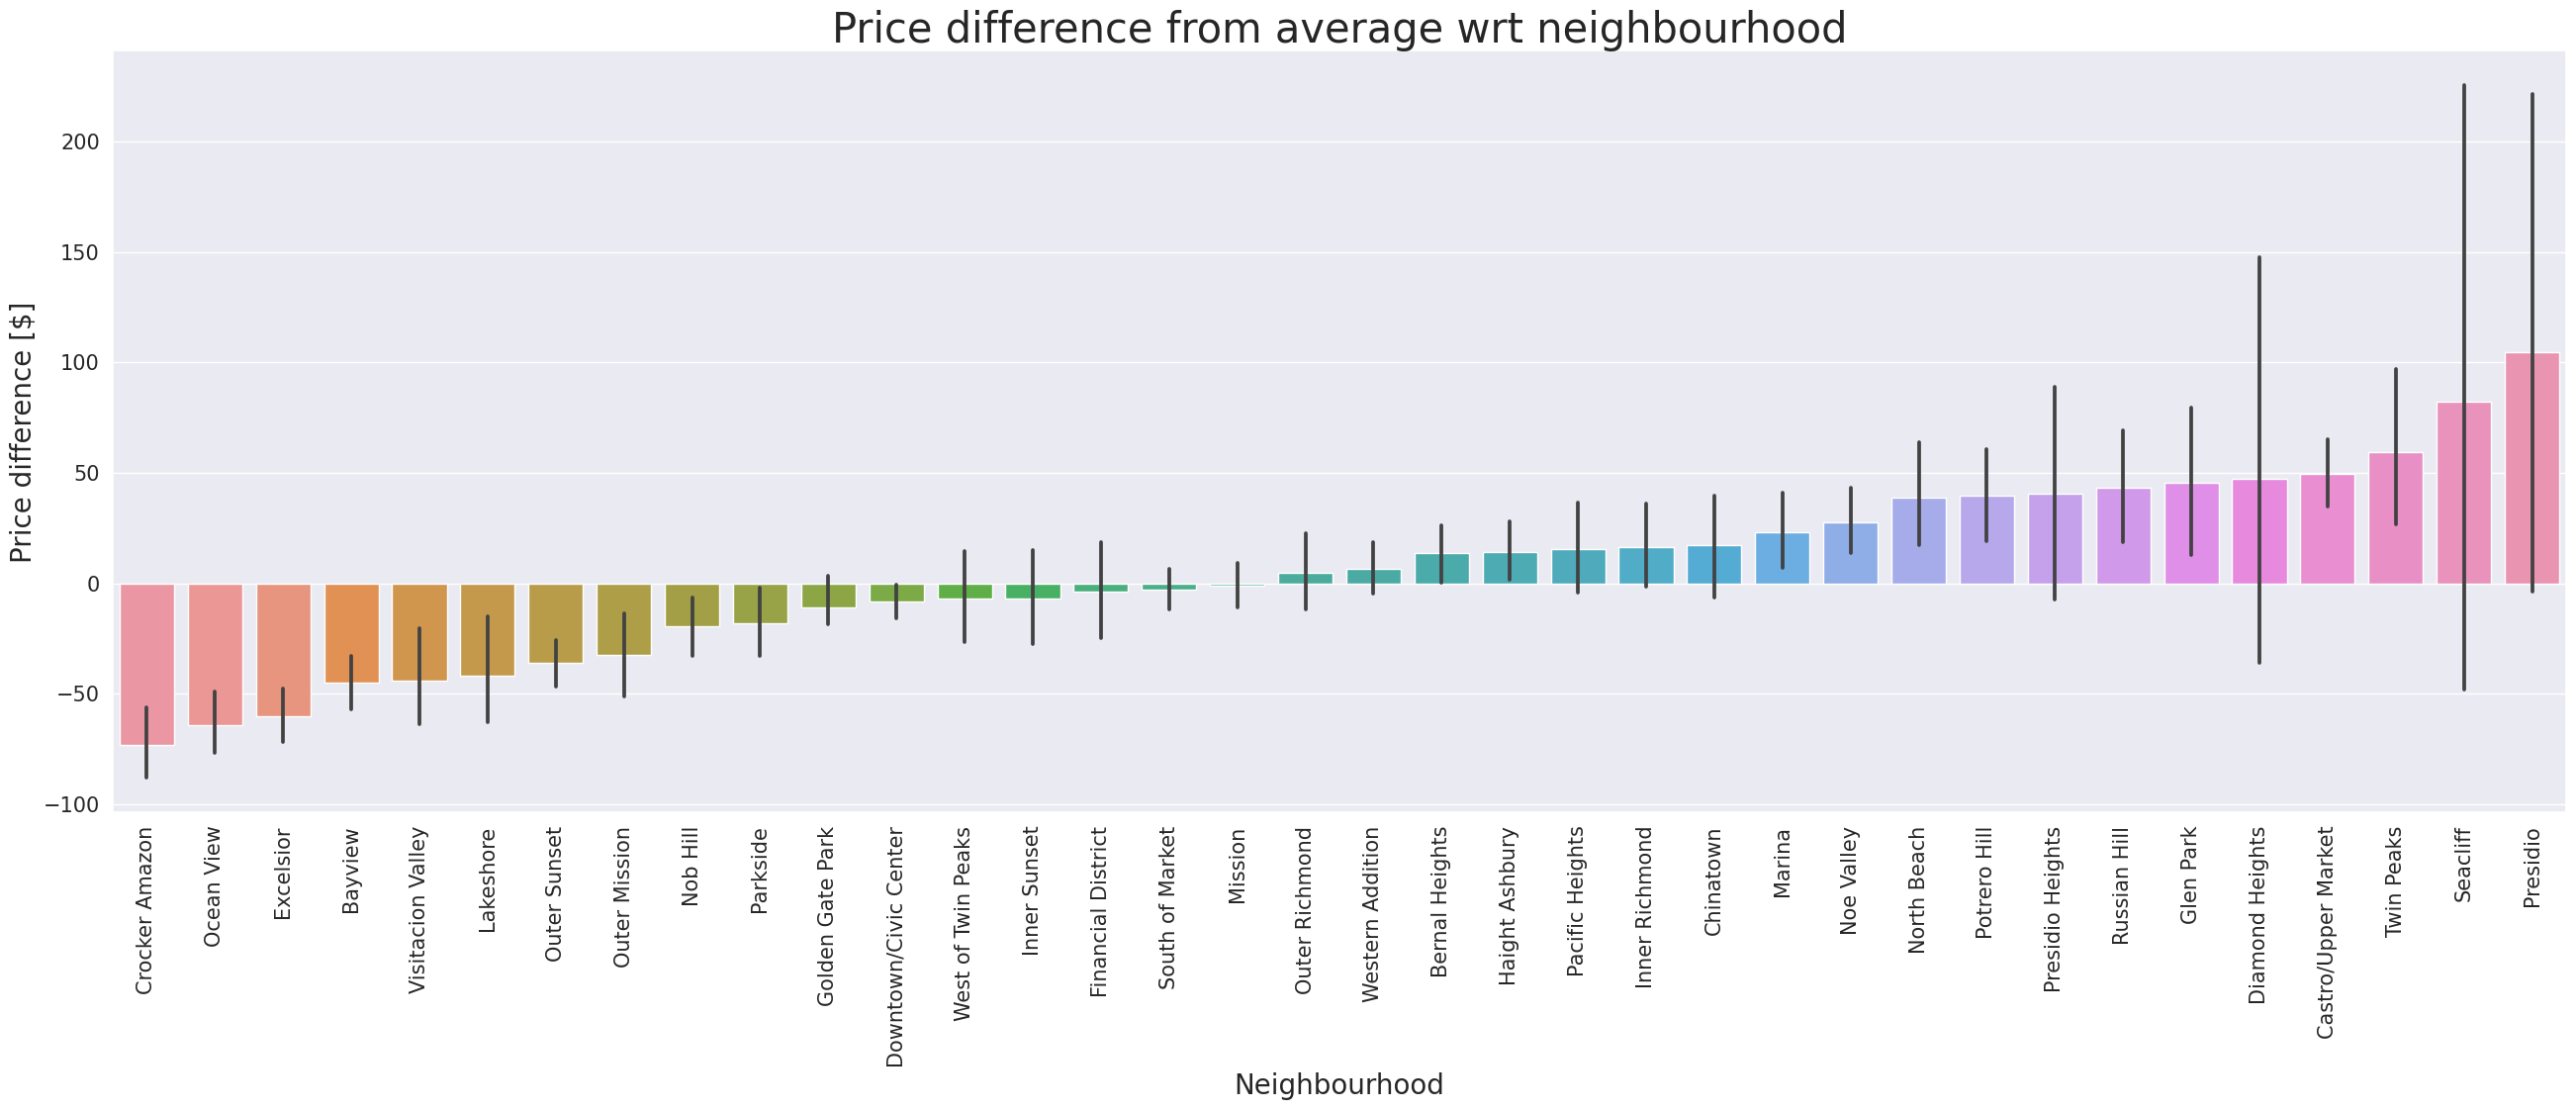

In [118]:
# difference between the price mean per month and the price mean
sf_listing_data_95['diff_mean'] = sf_listing_data_95['price'] - sf_listing_data_95['price'].mean()
sf_listings_sorted = sf_listing_data_95.groupby(['neighbourhood']).mean()['diff_mean'].sort_values()
c = sf_listings_sorted.to_frame()
print(c)
# Plot the price difference
fig2 = plt.figure(figsize=(32,10))
ax = fig2.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x = sf_listing_data_95['neighbourhood'], y = sf_listing_data_95['diff_mean'],order = c.index)
# Set axis label properties
ax.set_xlabel('Neighbourhood', weight='normal', size=20)
ax.set_ylabel('Price difference [$]', weight='normal', size=20)
plt.title('Price difference from average wrt neighbourhood', fontsize=30)
# Set tick label properties
ax.tick_params('x', labelsize=15, rotation=90)
ax.tick_params('y', labelsize=15)
plt.show()

***Result : Downtown,Mission, Western Addition and South of Market have most listings whereas Presidio, South of Market and Golden Gate Park have highest number of days available (Note: Golden Gate Park has only 3 listings availability so availability is not an accurate metric) and Presidio, Seacliff and Twin Peaks are the most expensive.***

***4. Does a host with more listings tend to list apartments in more popular areas and/or at higher prices?***

We would need to determine the top 10 hosts and then breakdown where they generally list their apartments and compare that to the average price of listings

***Hypotheses***

1. If a host has more listings, the rental price will be higher.
2. Alternatively, if a host has fewer listings, the rental prices will generally be lower.
3. If a rental price is below average, they will have more reviews in the last 12 months.

***Geographical Visualizations***

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [120]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [121]:
# Import ".json" file for the San Francisco. 

country_geo = r'neighbourhoods.geojson'

In [122]:
# To check/look at the JSON file contents:

f = open(country_geo)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-122.484089, 37.78791], [-122.484346, 37.787654], [-122.487434, 37.787491], [-122.487123, 37.78376], [-122.492526, 37.783501], [-122.492407, 37.781663], [-122.505317, 37.780998], [-122.505144, 37.779774], [-122.5062, 37.779868], [-122.507818, 37.779952], [-122.509504, 37.779923], [-122.509342, 37.779145], [-122.509095, 37.77519], [-122.513169, 37.775046], [-122.51317, 37.775109], [-122.51315, 37.775202], [-122.513168, 37.775295], [-122.513139, 37.775383], [-122.513155, 37.775413], [-122.513118, 37.775495], [-122.513116, 37.775992], [-122.51322, 37.776643], [-122.513262, 37.776766], [-122.513273, 37.776853], [-122.513301, 37.776996], [-122.513337, 37.777197], [-122.513351, 37.77733], [-122.513419, 37.777443], [-122.513485, 37.777542], [-122.513512, 37.777603], [-122.513606, 37.777634], [-122.51379, 37.777711], [-122.51397, 37.777743], [-122.51413, 37.777902], [-122.514272, 37.778125], [-122.514414, 37.778271], [

In [123]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = sf_listing_data_95[['neighbourhood','price']]
data_to_plot.head()

,neighbourhood,price
0,Western Addition,194
1,Mission,125
2,Pacific Heights,55
3,Bernal Heights,100
4,Diamond Heights,167


In [130]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [37.78791, -122.484089], zoom_start = 9)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['neighbourhood', 'price'],
    key_on = 'feature.properties.neighbourhood', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [129]:
map.save('plot_data.html')

Based on the above map, we can see that prices of AirBnB rentals are generally more expensive in the coastal areas. Of course, this map is only showing San Francisco neighborhood_group, it is likely that specific unique neighborhoods within these districts would provide more detail to the specific neighborhoods.

In [131]:
# While the above heat map does provide a general overview of the potentially
# higher price rentals, I have included a plot map to provide more detail.

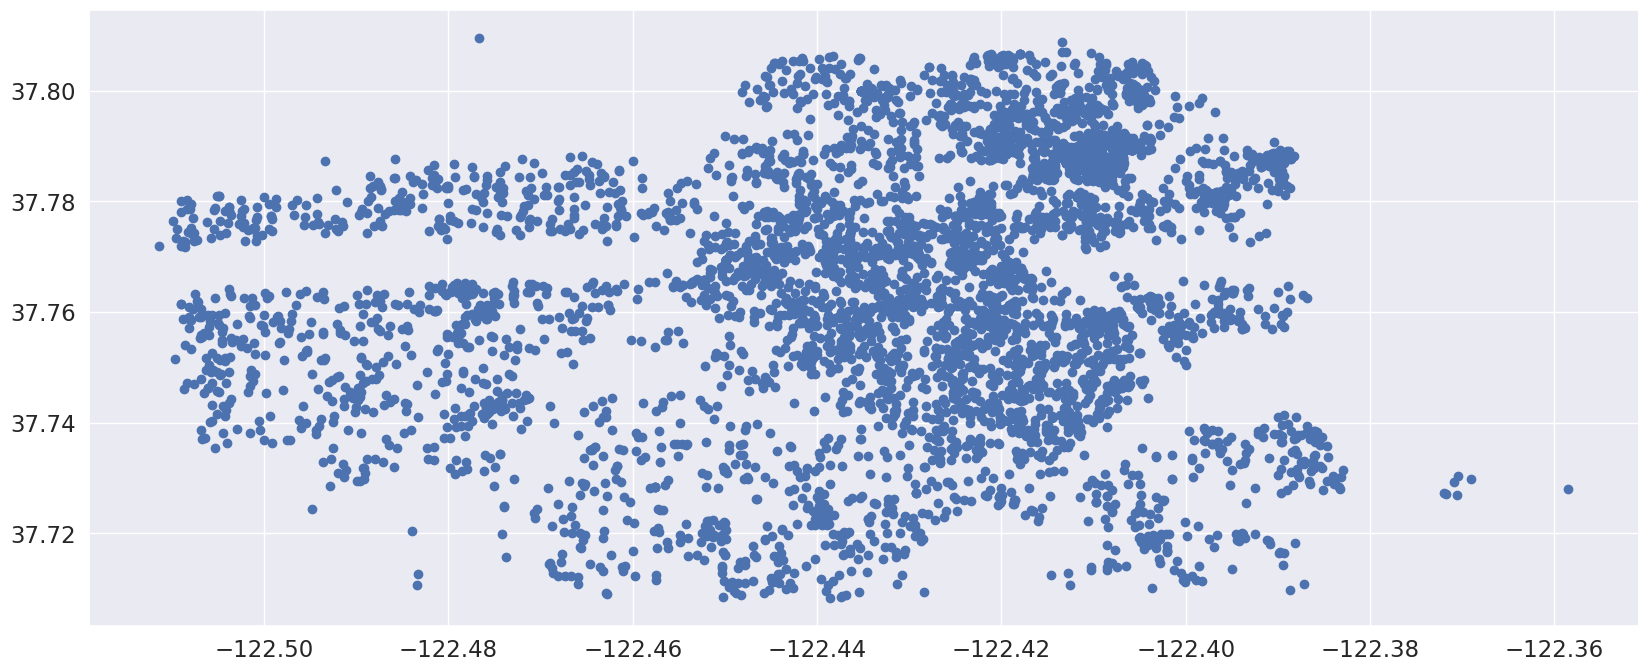

In [132]:
import matplotlib.pyplot as plt
plt.scatter(x=sf_listing_data_95['longitude'], y=sf_listing_data_95['latitude'])
plt.show()

Without including another variable such as prices/availability_365, we cannot compare whether price or availability has an impact on where apartments are more frequently rented out.

Creating a plot using plotly where I can determine the highest concentration of rentals as well show their price ranges

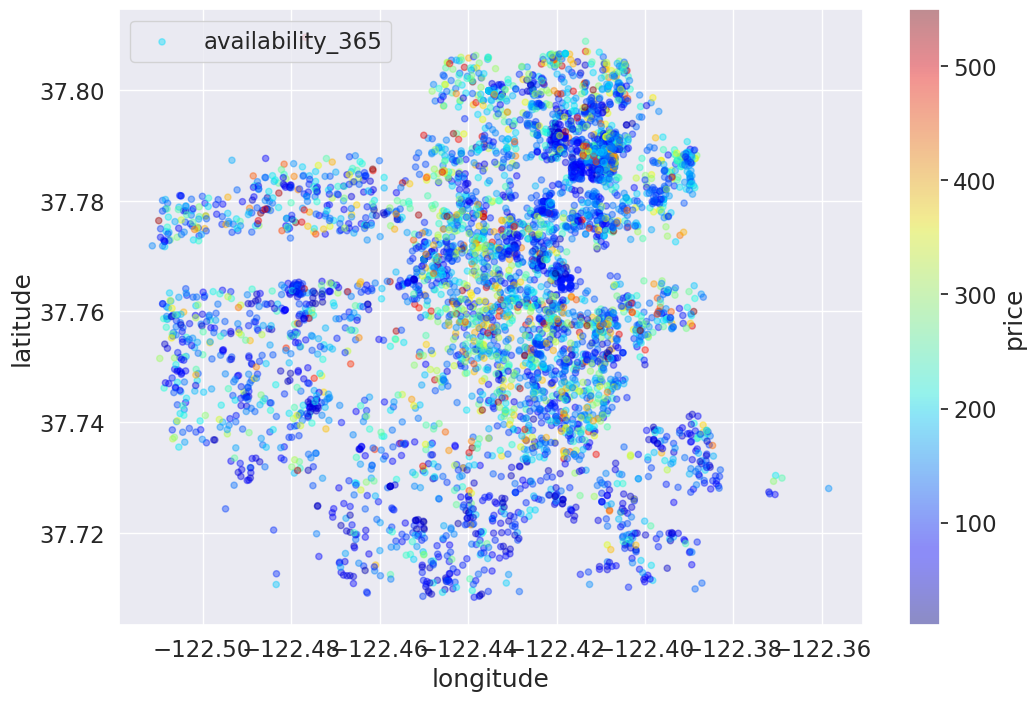

In [133]:
iz=sf_listing_data_95.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(12,8))

While I personally understand the concentration of the map, without a map as a background, it is a bit unclear to the average reader what the information details. Nonetheless, when compared to the JSON map, we can more clearly see that there is a significant concentration of higher prices and high levels of availability all year for apartments that are closer to the city center, which would be common for a metropolis.

While there is obviously a lot of concentration and variety in terms of price ranges as well as availability all year round, there are several white spaces in the middle of the image where no rentals are possible. This could be maybe due to defunctioning of the airport or maybe empty space is used directly for some other purpose by that city. There could be more assumptions.

I will also try adding a png/jpeg as a background to indicate more clearly what this map is showing relative to San Francisco's city borders.